# Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

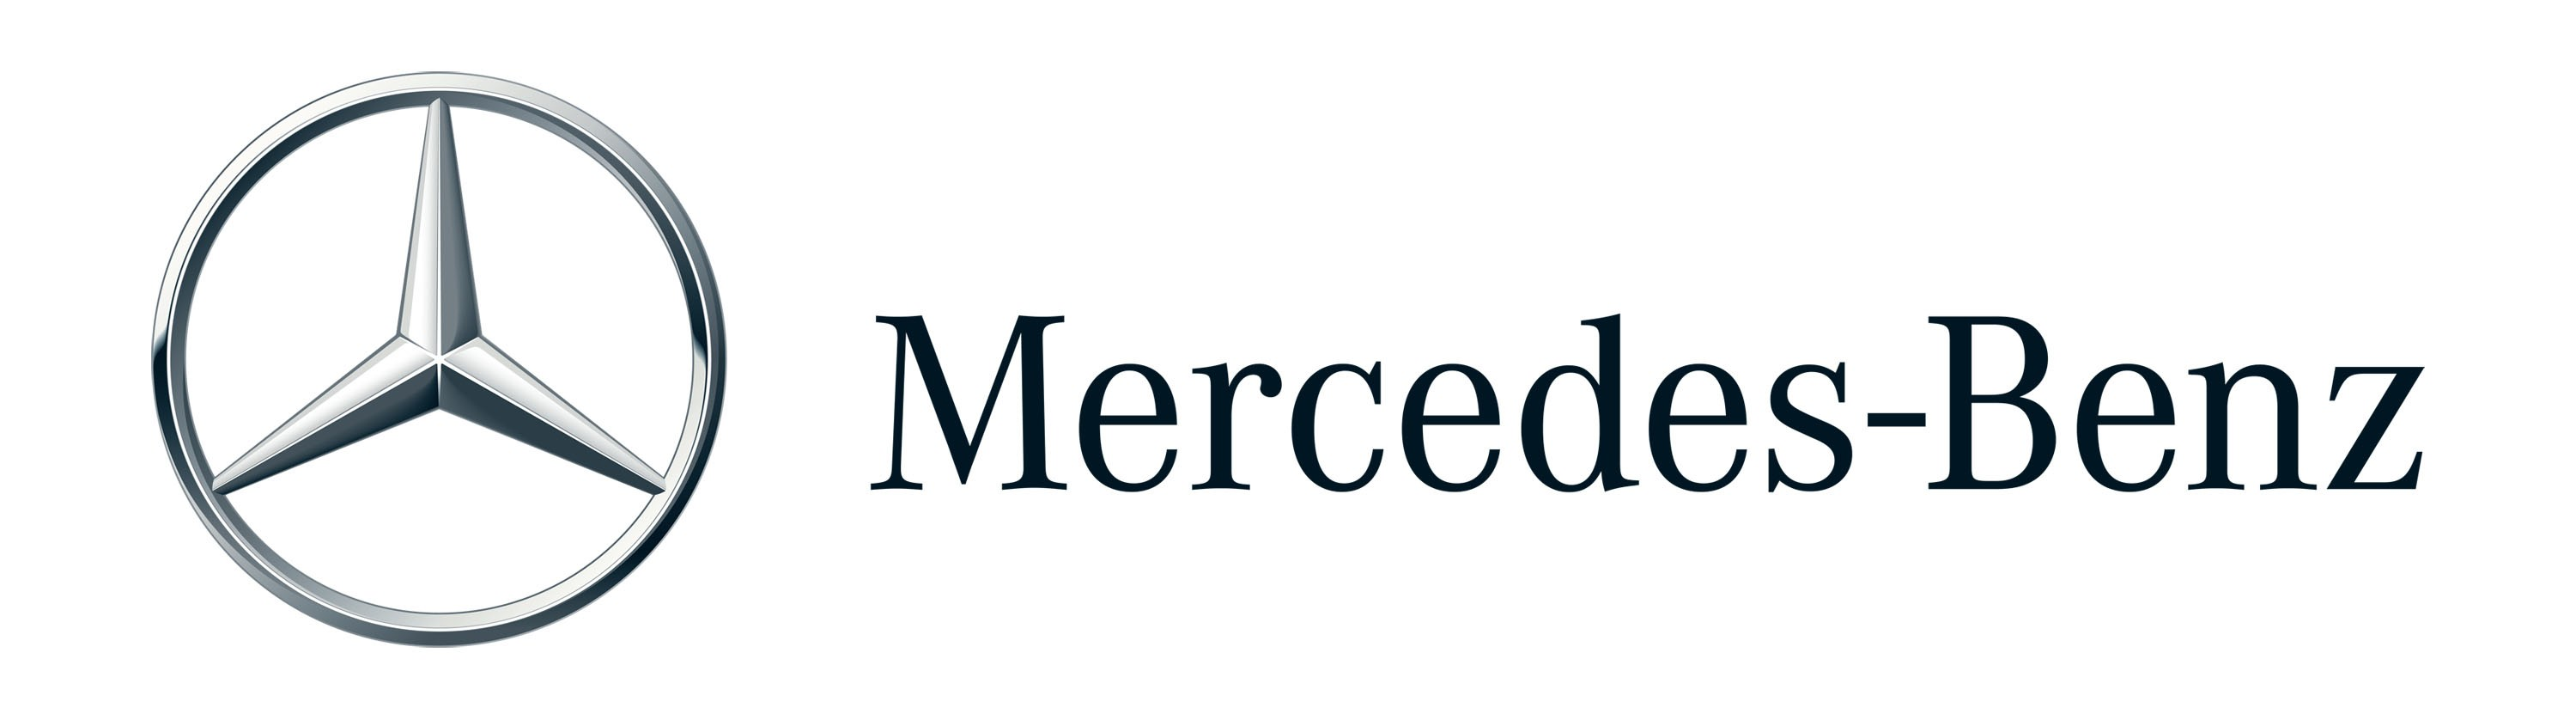

# Content

# EDA Analysis of Mercedes Benz Greener Manufacturing

## 1. Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
train = pd.read_csv('../input/mercedesbenz-greener-manufacturing/train.csv')
test = pd.read_csv('../input/mercedesbenz-greener-manufacturing/test.csv')
print('Shape of Train data: {}'.format(train.shape))
print('Shape of Test data: {}'.format(test.shape))

Shape of Train data: (4209, 378)
Shape of Test data: (4209, 377)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [5]:
test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

## 2. Analysis of ground truth values

### 2.1 Checking distribution of Testing Time 

In [6]:
print('75th Percentile value of test time is: ',np.percentile(train['y'],75))
print('='*50)
print('Mean value of test time is: {}'.format(train['y'].mean()))
print('='*50)
print('25th Percentile value of test time is: ',np.percentile(train['y'],25))

75th Percentile value of test time is:  109.01
Mean value of test time is: 100.66931812782134
25th Percentile value of test time is:  90.82


Text(0, 0.5, 'Time (secs)')

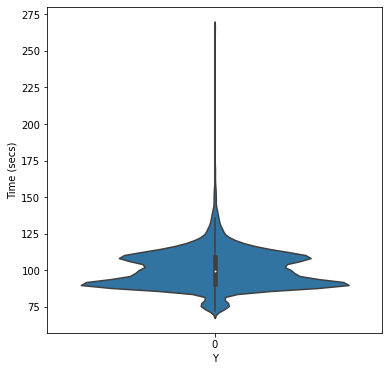

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.violinplot(data=train['y'])
plt.xlabel('Y')
plt.ylabel('Time (secs)')

<h5>Above plot shows us that there are outliers becuase of its long tail. Violin plot have two hills means that our data has most of the distributions falling in these two regions which are around our mean.<h5/>

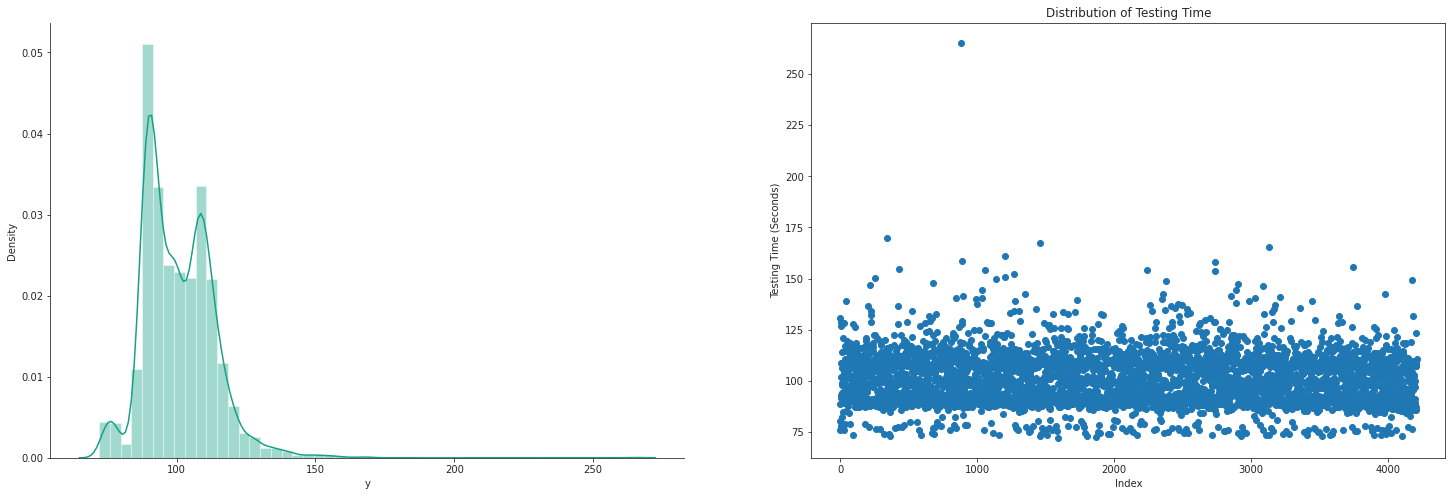

In [8]:
%matplotlib inline
sns.set_style('ticks')
plt.figure(figsize=(25,8))
plt.subplot(121)
sns.distplot(train['y'], color='#16A085')
plt.xlabel('y')
sns.despine()
plt.subplot(122)
plt.scatter(range(len(train['y'])), train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Index")
plt.ylabel("Testing Time (Seconds)")
plt.show()

### Observation

We can infer from this observation that most of the data points lies in range of 75 to to 125 secs with mean as 100.66 secs.

### 2.2 Handling Outliers

In [9]:
for i in range(0,11):
    print(90+i,'Percentile value is',np.percentile(train['y'],90+i))

90 Percentile value is 115.25
91 Percentile value is 116.04840000000002
92 Percentile value is 116.89160000000001
93 Percentile value is 118.0376
94 Percentile value is 119.056
95 Percentile value is 120.806
96 Percentile value is 122.4
97 Percentile value is 125.89319999999998
98 Percentile value is 129.2992
99 Percentile value is 137.43040000000002
100 Percentile value is 265.32


In [10]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(train['y'],99+(i/100)))

99.1 percentile value is 139.09024
99.2 percentile value is 140.18360000000004
99.3 percentile value is 140.81639999999993
99.4 percentile value is 142.6480000000001
99.5 percentile value is 146.2304000000001
99.6 percentile value is 149.0374399999998
99.7 percentile value is 151.4276800000003
99.8 percentile value is 154.68695999999994
99.9 percentile value is 160.38328000000087
100.0 percentile value is 265.32


In [11]:
y_limit = 155
ind = train[train.y > y_limit].index
print(ind)

Int64Index([342, 883, 889, 1203, 1459, 2735, 3133, 3744], dtype='int64')


In [12]:
train = train.drop(index = train[train.y > y_limit].index)
train.shape

(4201, 378)

### Observation

1. From the above percentiles we can observe the fact that there is one outlier point which is very large and it should be removed from the data.


2. We can take 155 seconds as our threshold value after which all the points greater than this threshold value can be trated as the outlier points.

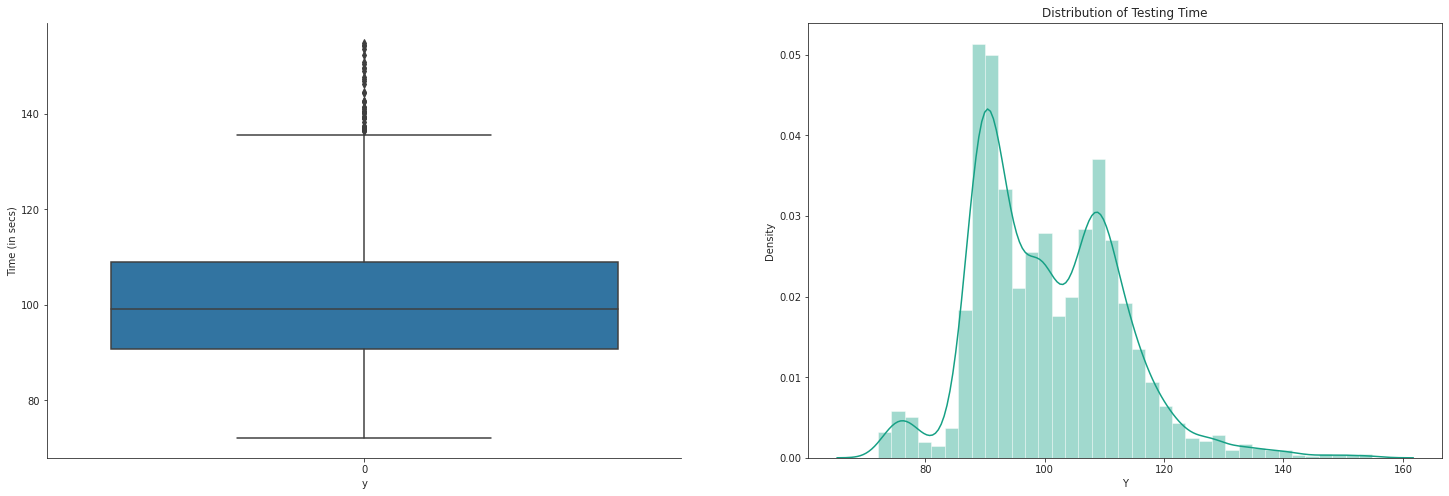

In [13]:
%matplotlib inline
sns.set_style('ticks')
plt.figure(figsize=(25,8))
plt.subplot(121)
sns.boxplot(data=train['y'])
plt.xlabel('y')
plt.ylabel("Time (in secs)")
sns.despine()
plt.subplot(122)
sns.distplot(train['y'], color='#16A085')
plt.title("Distribution of Testing Time")
plt.xlabel("Y")
plt.ylabel("Density")
plt.show()

### Observation

We can now see that the outliers are removed from the test times of the train set and test set and data is now not skewed.

## 3. Handling Missing Values

### 3.1 Checking the Null values in dataset

In [14]:
isNan_train = train.isnull().sum().any()
isNan_test = test.isnull().sum().any()

if isNan_train == True:
    print("There are NaN values in the Train dataset")
else:
    print("There are No NaN values in the Train dataset")
    
if isNan_test == True:
    print("There are NaN values in the Test dataset")
else:
    print("There are No NaN values in the Test dataset")

There are No NaN values in the Train dataset
There are No NaN values in the Test dataset



### 3.2 Checking the duplicate values in dataset

In [15]:
isDup_train = train.duplicated().sum().any()
isDup_test = test.duplicated().sum().any()

if isDup_train == True:
    print("There are Duplicate rows in the Train dataset")
else:
    print("There are No Duplicate rows in the Train dataset")

if isDup_test == True:
    print("There are Duplicate rows in the Test dataset")
else:
    print("There are No Duplicate rows in the Test dataset")

There are No Duplicate rows in the Train dataset
There are No Duplicate rows in the Test dataset


#### Observation

There are no duplicate data and no missing values in train and test data

## 4. Analyzing Categorical Data

### 4.1 Checking the total number of rows having each customization

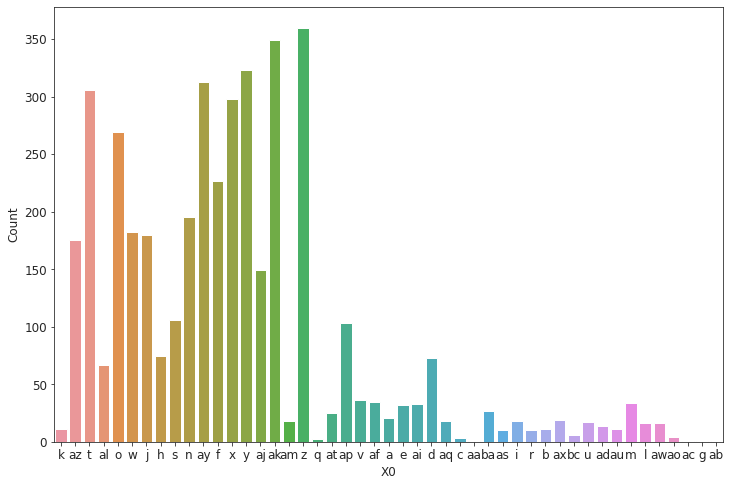

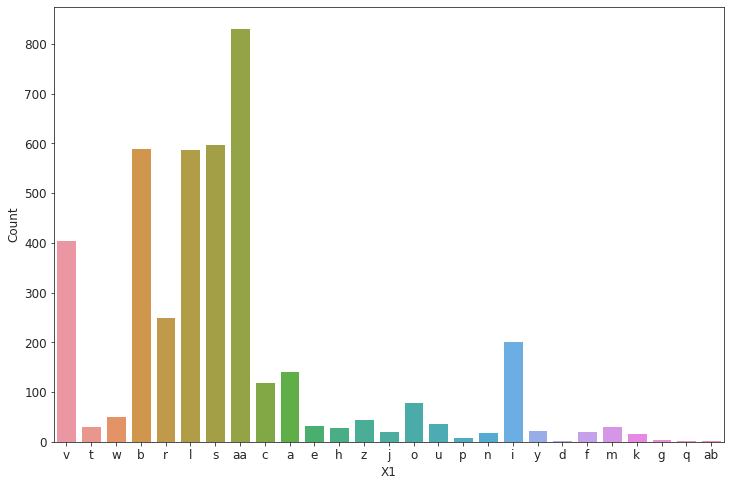

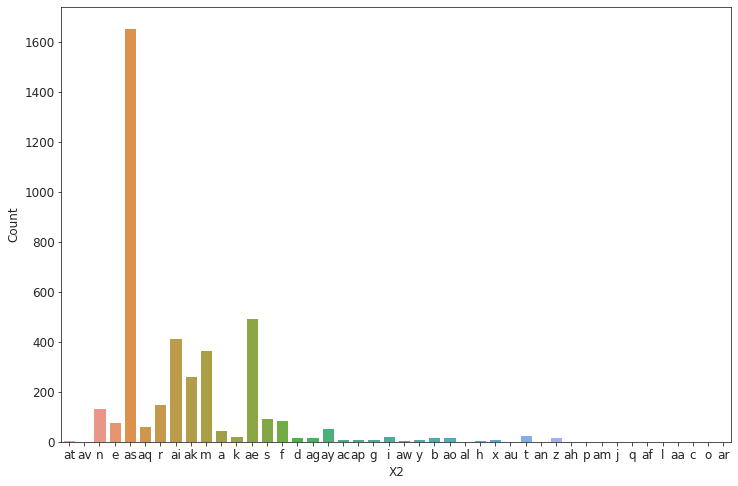

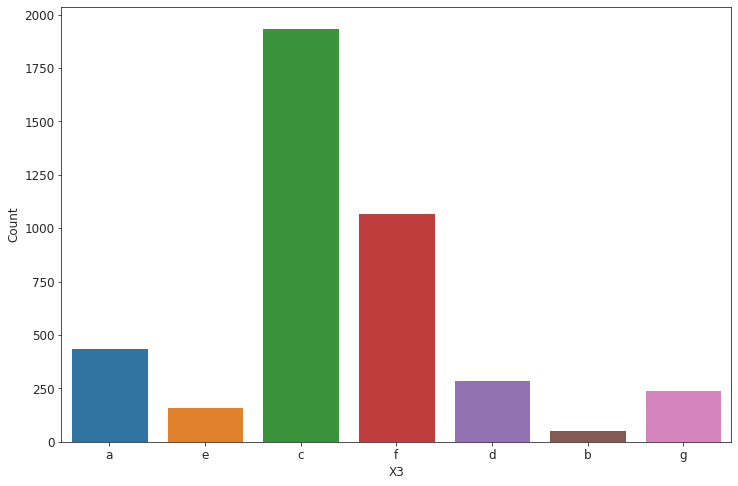

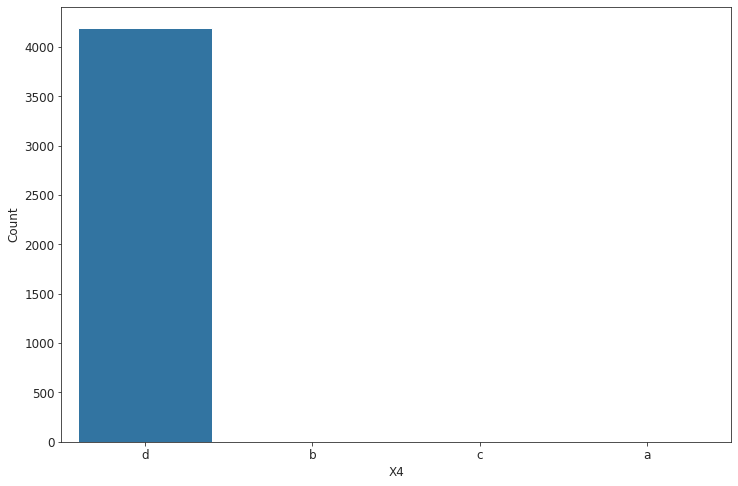

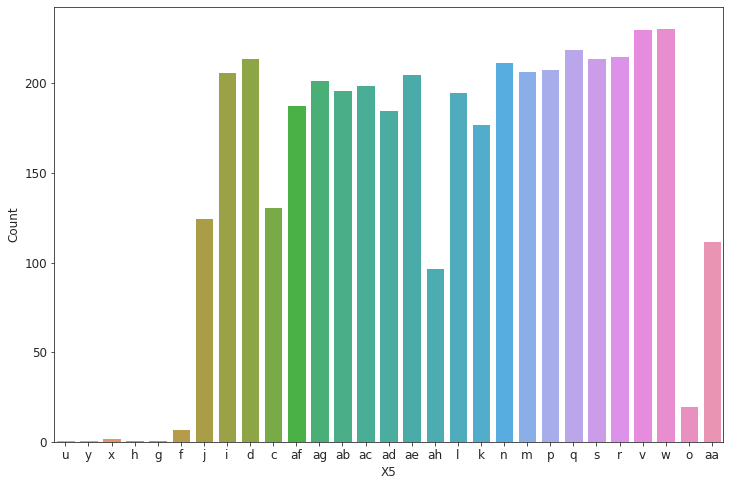

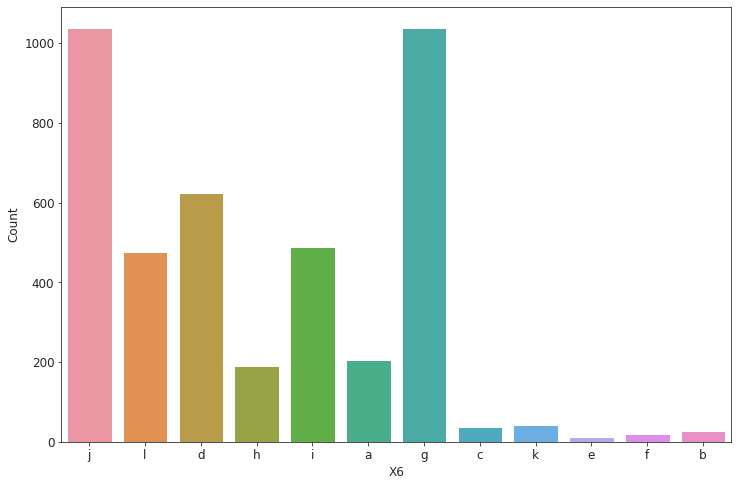

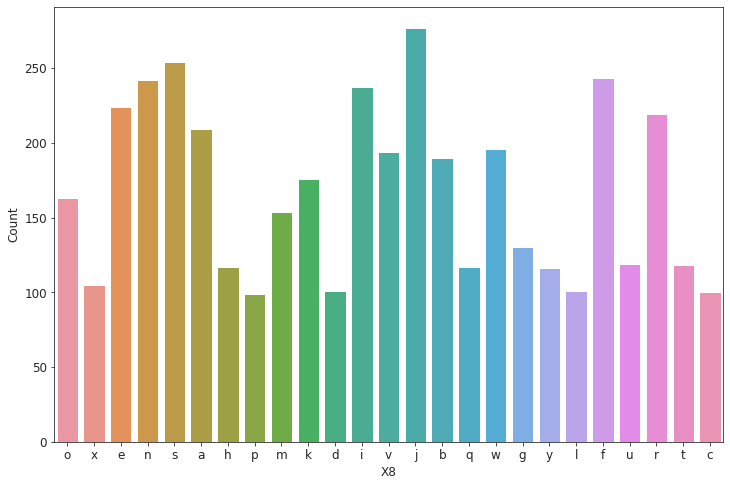

In [16]:
cat_features = train.columns[train.dtypes == 'object']

for col in cat_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8 )
    sns.countplot(data=train, x=col) 
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    plt.show()

### Observation

1. We can observe that X0 , X5 and X8 are the features that are having a large variety of data in it and hence they can be very useful for feature attraction.


2. X4 consists of only the vehicles which have only one customization anonymously named as 'd' and hence the variance is very low and it could not provide us with much information.




### 4.2 Checking the time taken by each customization given a feature

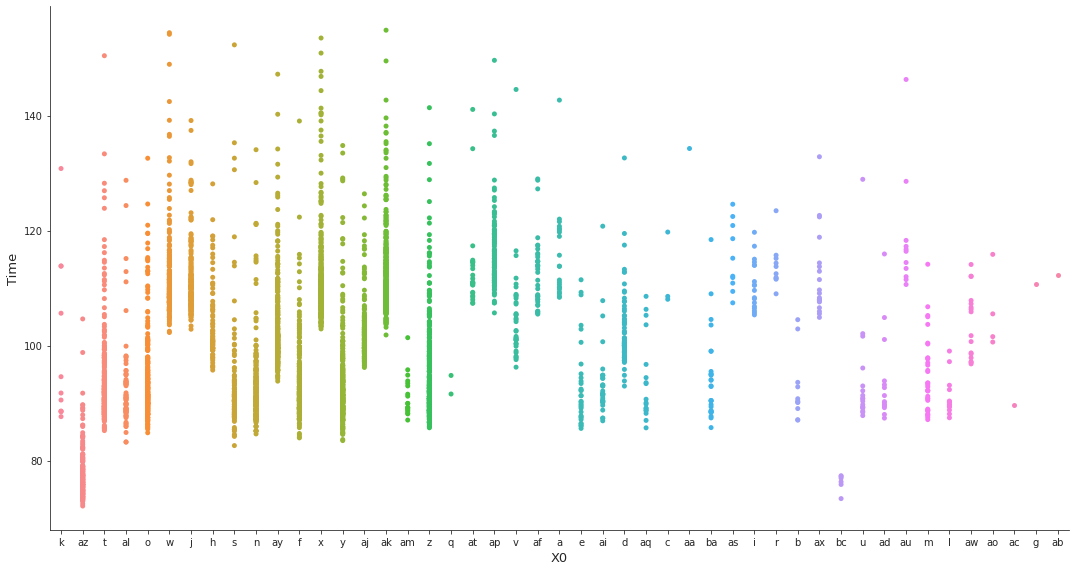

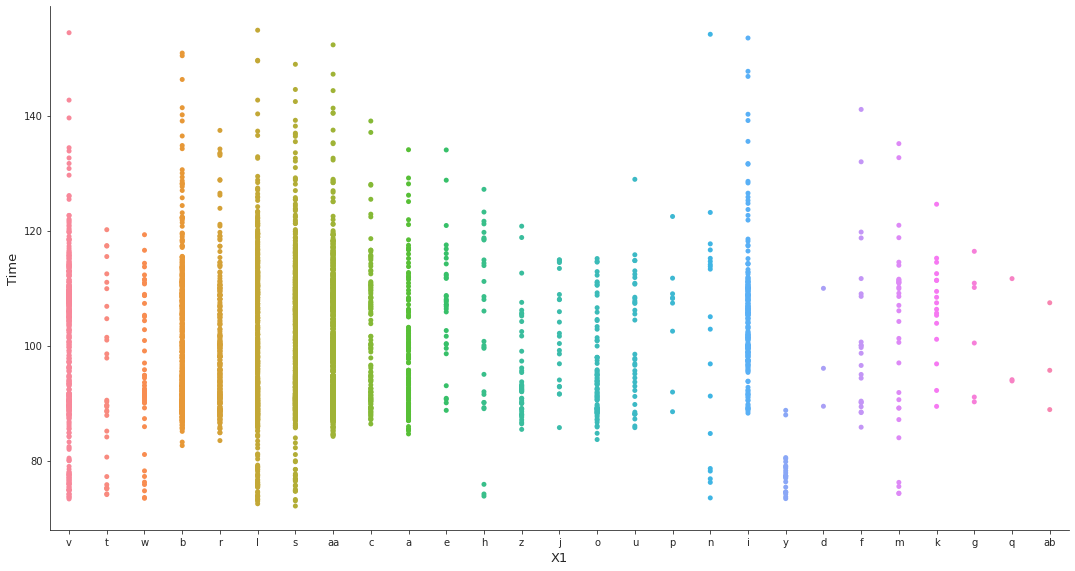

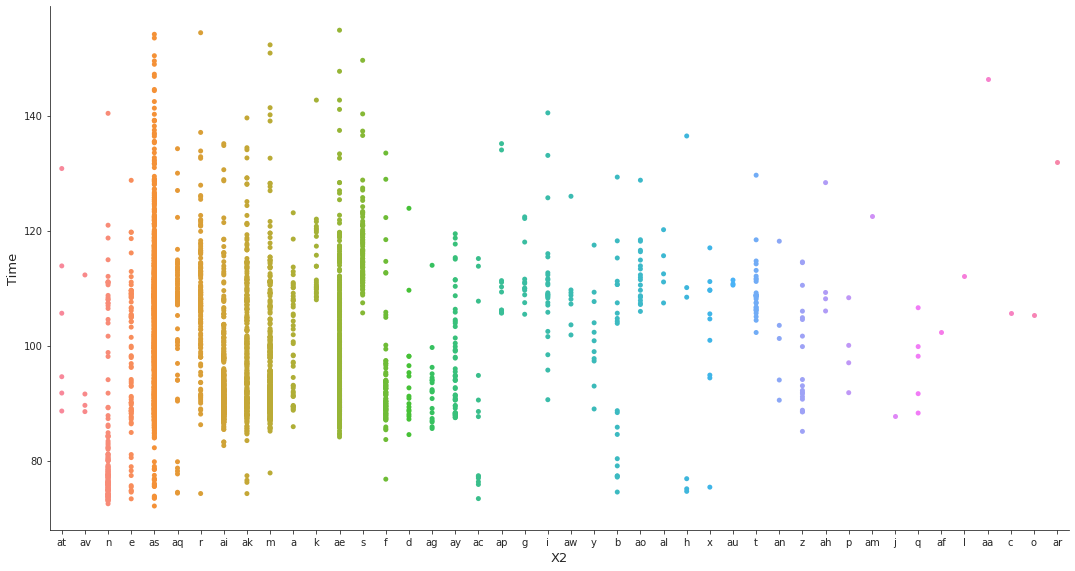

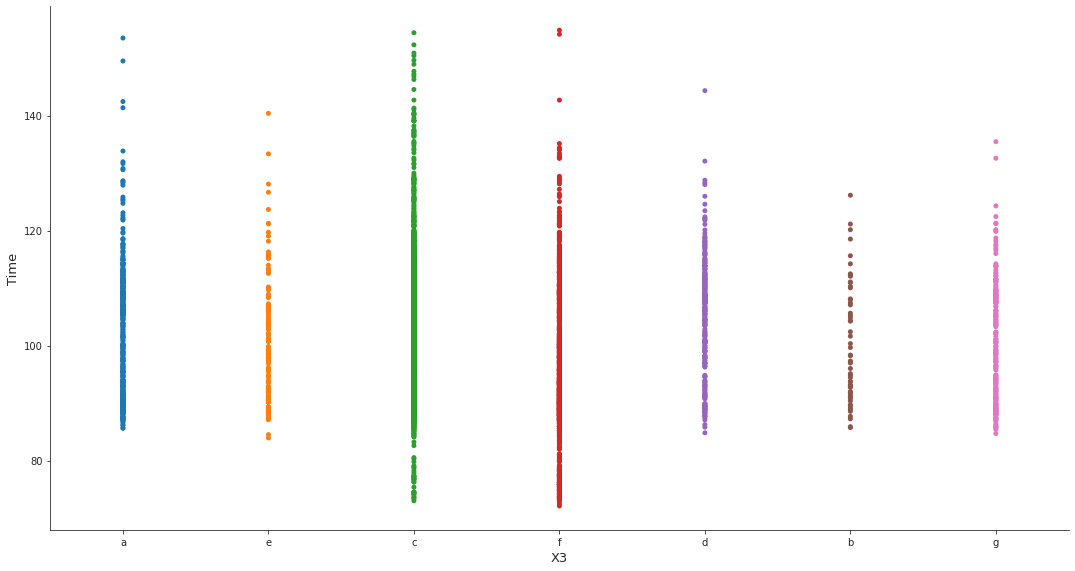

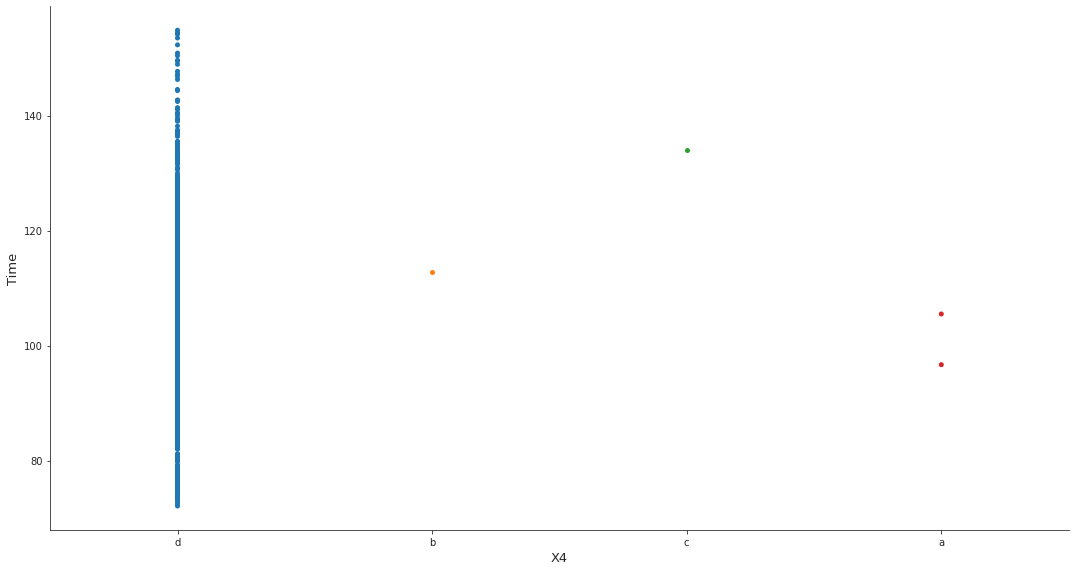

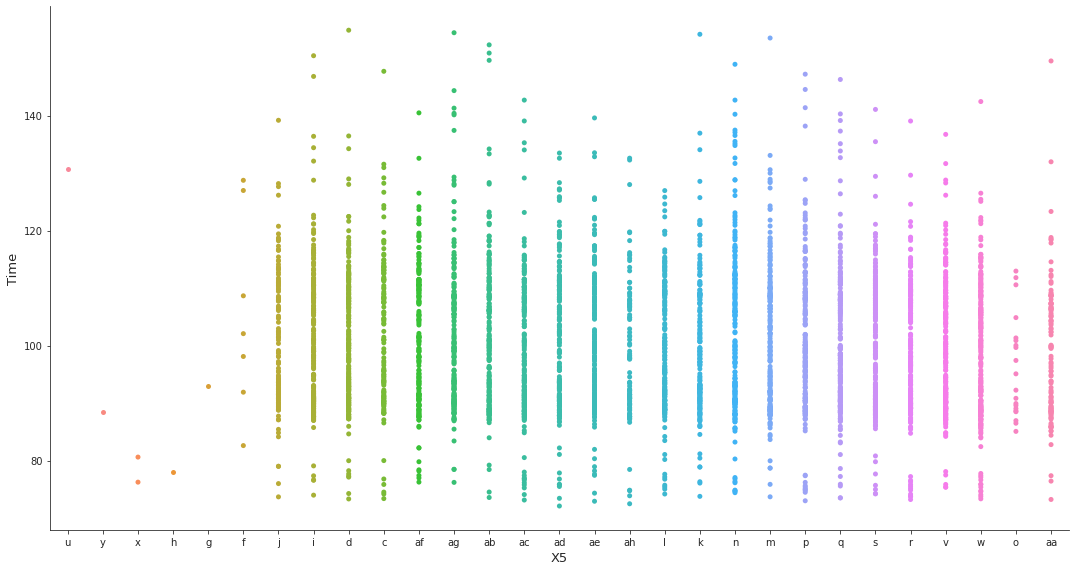

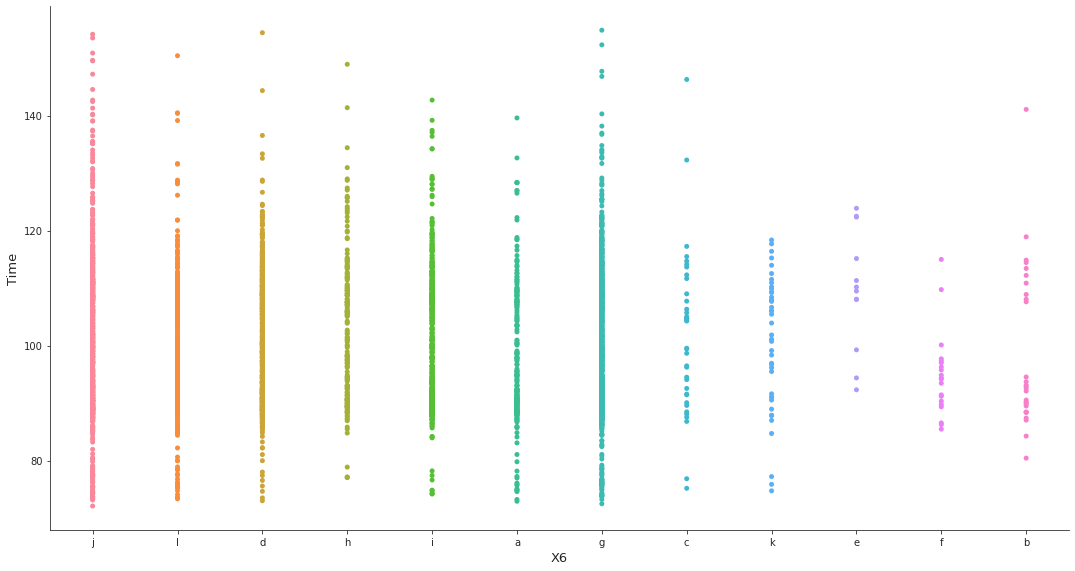

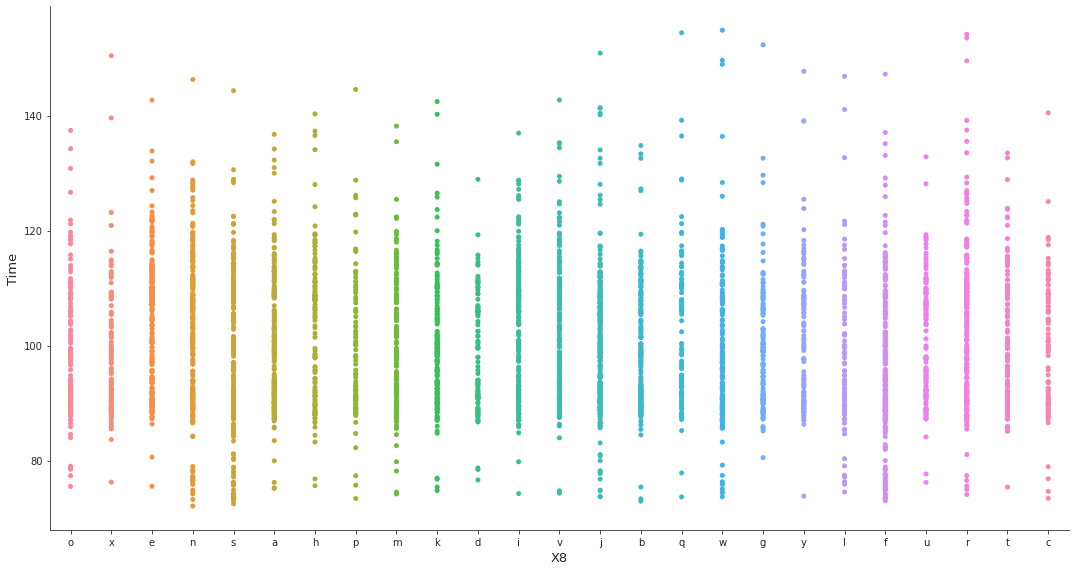

In [17]:
for col in cat_features:
    sns.catplot(ax=ax,data=train,x=col,y='y',jitter=False,height=8, aspect=15/8)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Time', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    sns.despine()

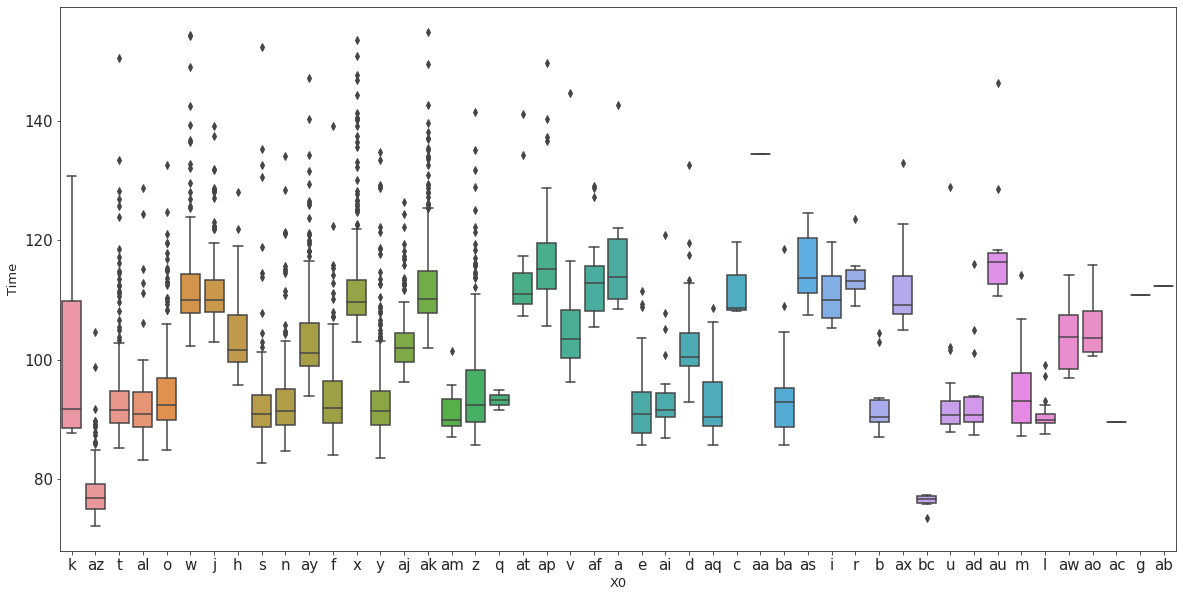

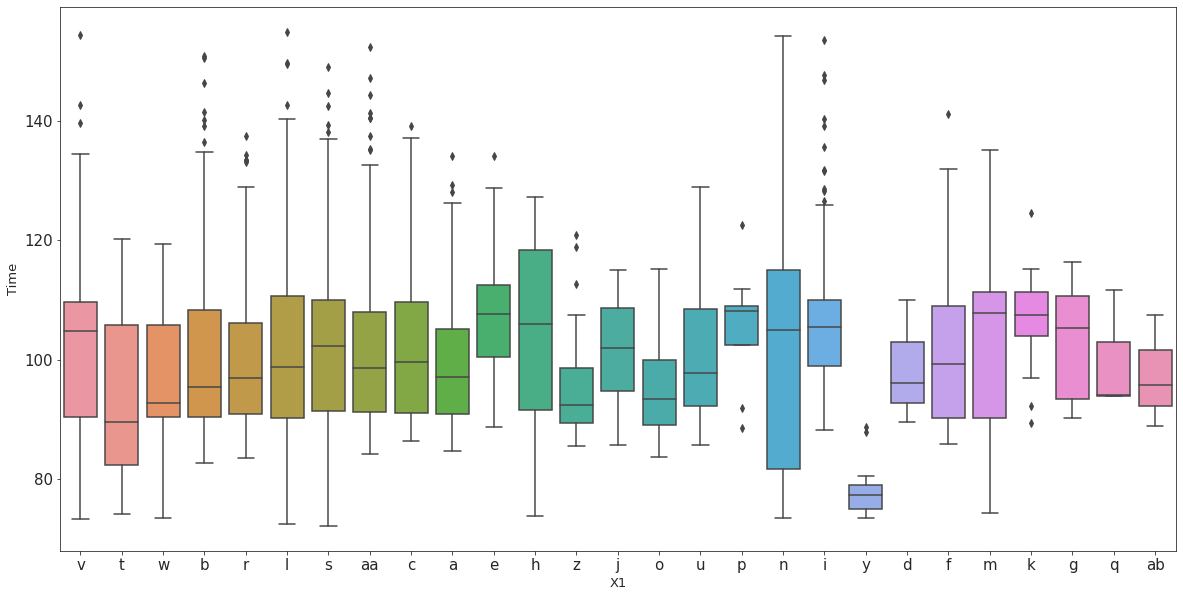

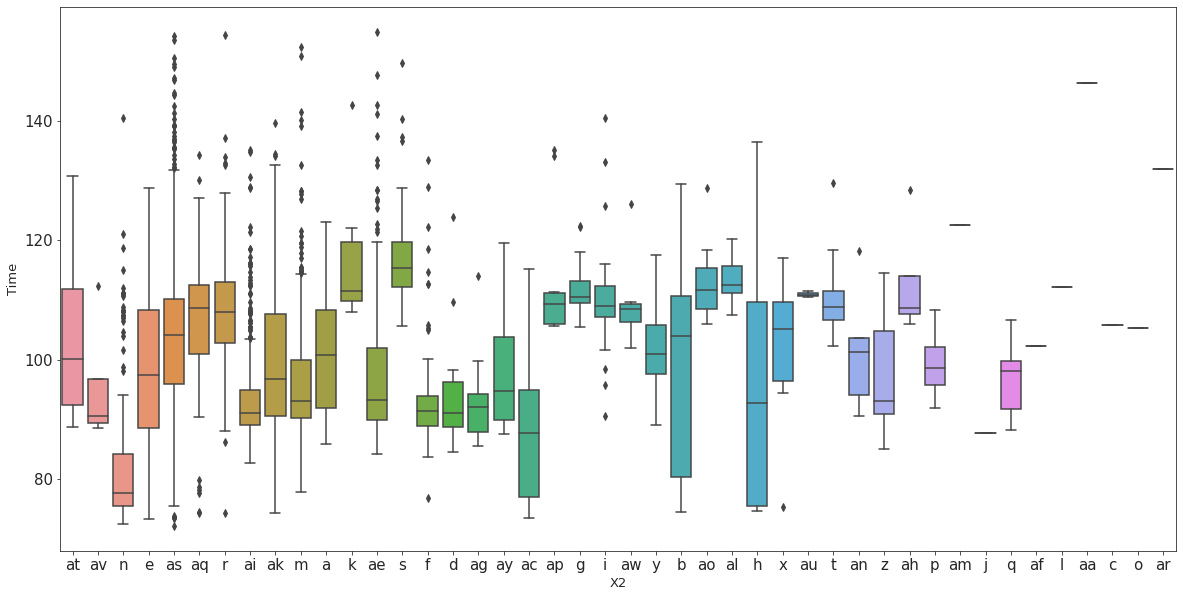

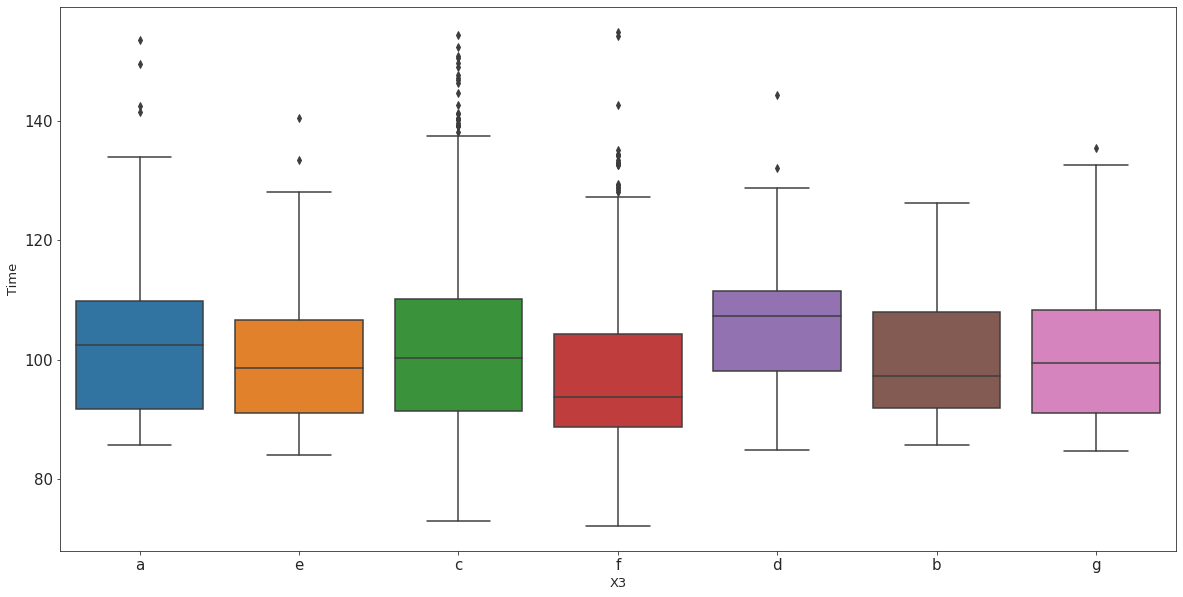

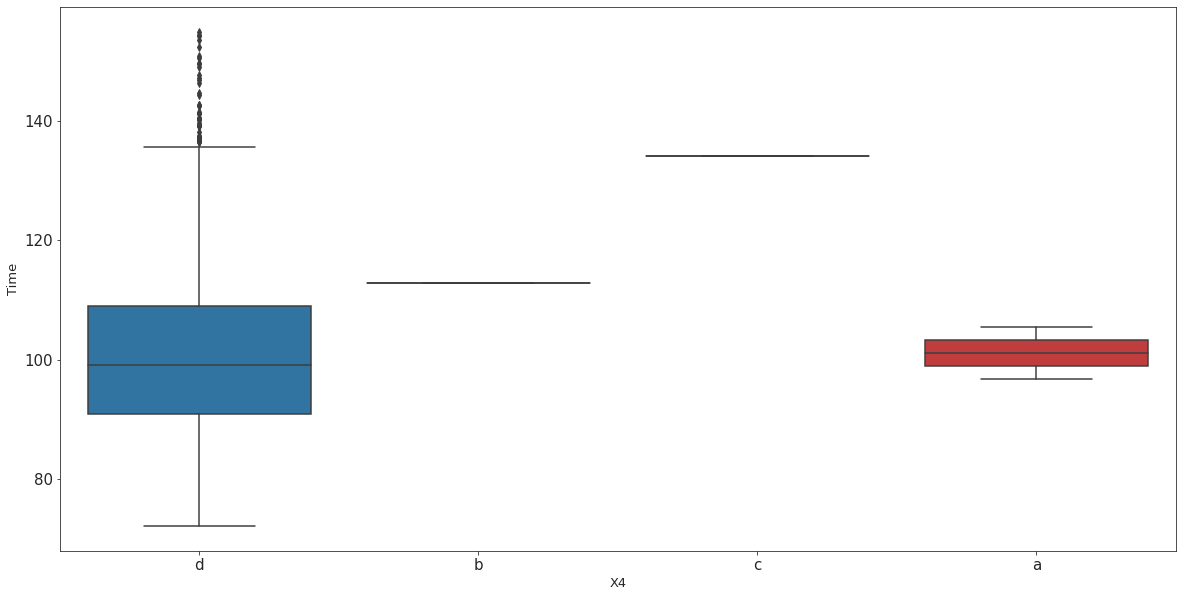

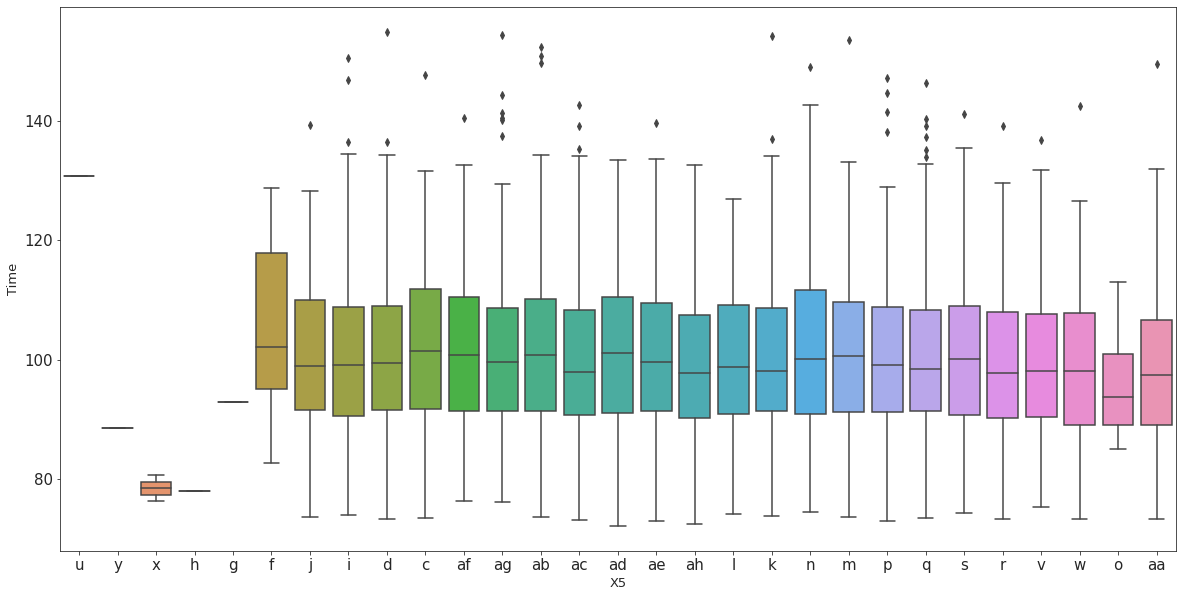

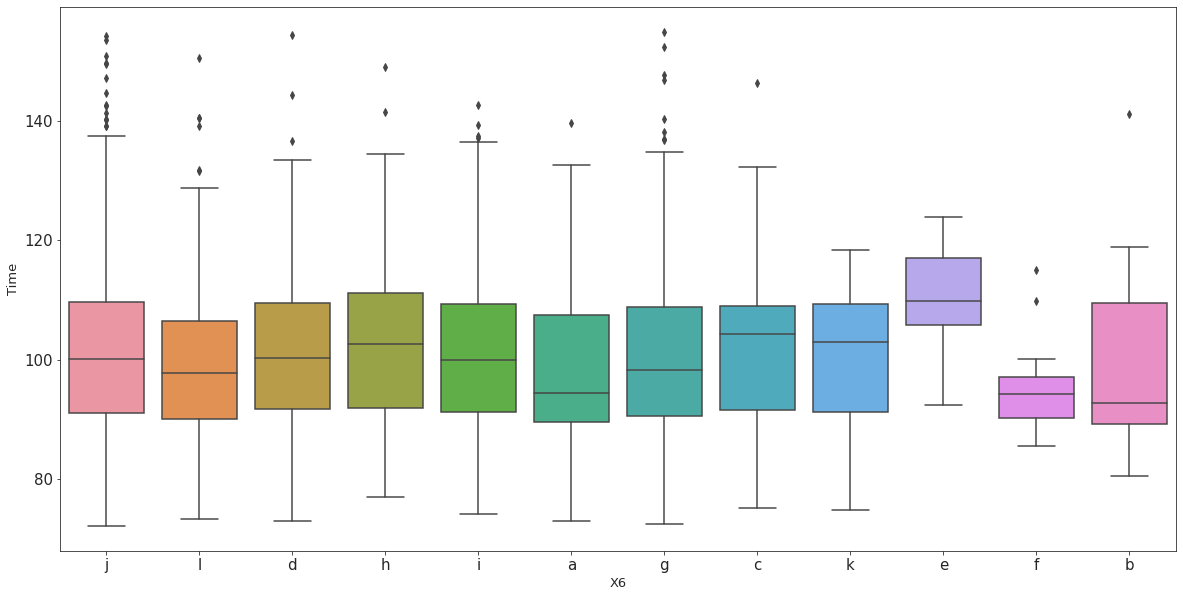

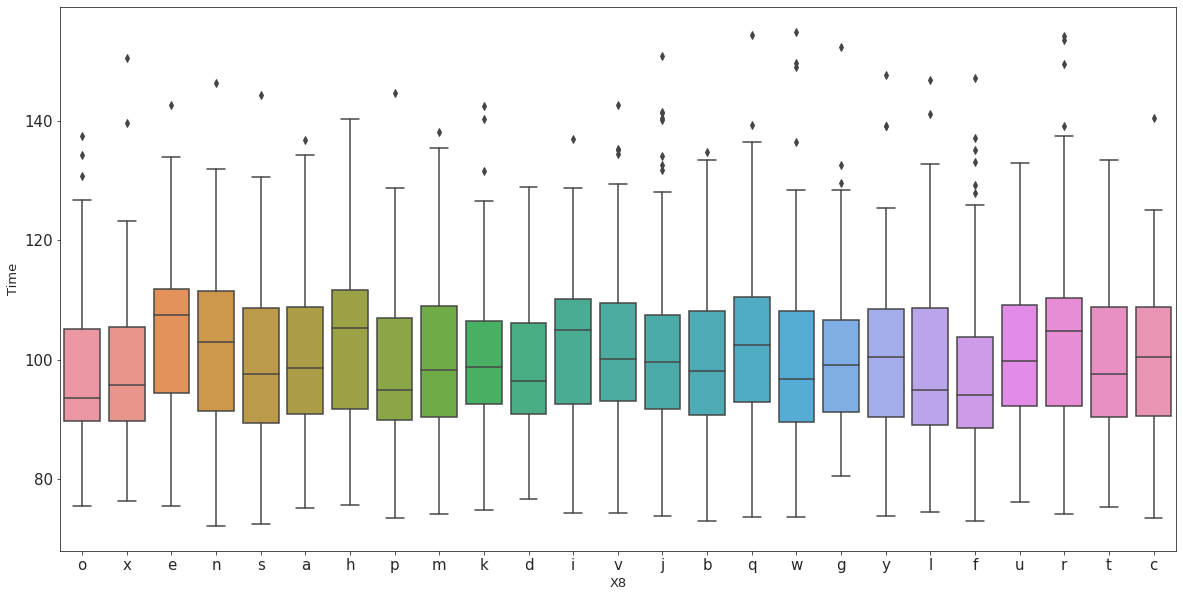

In [18]:
for col in cat_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10 )
    sns.boxplot(x=train[col],y=train['y'])
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Time', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

### Observation

A. When we observe the box plots of X0 we can clearly see that az and bc are two customizations that are not overlapping with the other customizations and hence they can be grouped as seperate entities. 


    1. Customizations like (s,n,f and y) and (b , u, ad) are all having the same distribution of time. So we can infer from this that maybe the customizations are different in their behaviours but may take same test time.
    
    
    2. Some customizations like k have very large distribution of test time and it concludes that these type of customizations are crucial and they may take large time or may end up early according to the vehicle model.
    
    
    
B. In X1 and X5 all the customizations have almost same distribution except 'v' in X1 and 'x' in X5. X6 and X8 have same distributed customizations.


C. X4 has very less variance and it can be removed as it is not providing that much of the information.

### 4.3 Checking the total test time in hours that each customization took from every row

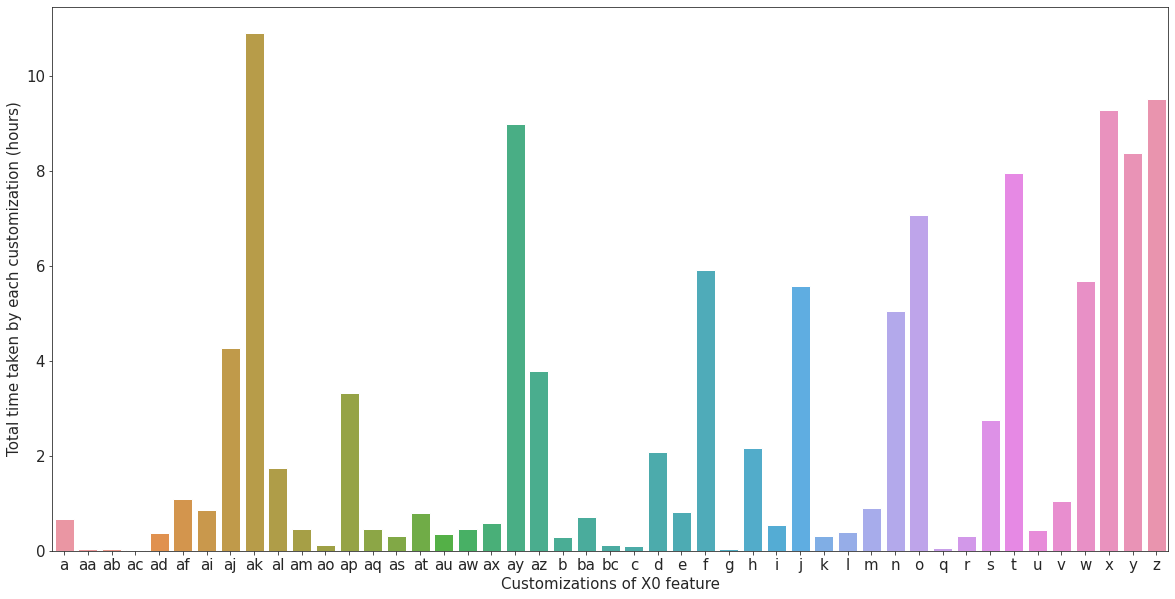

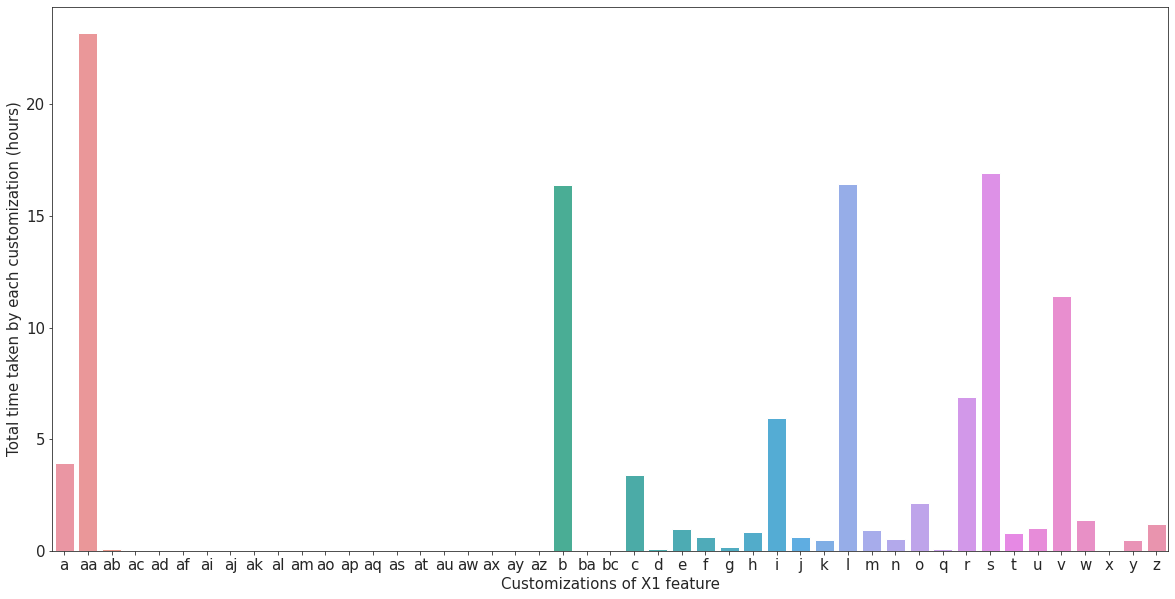

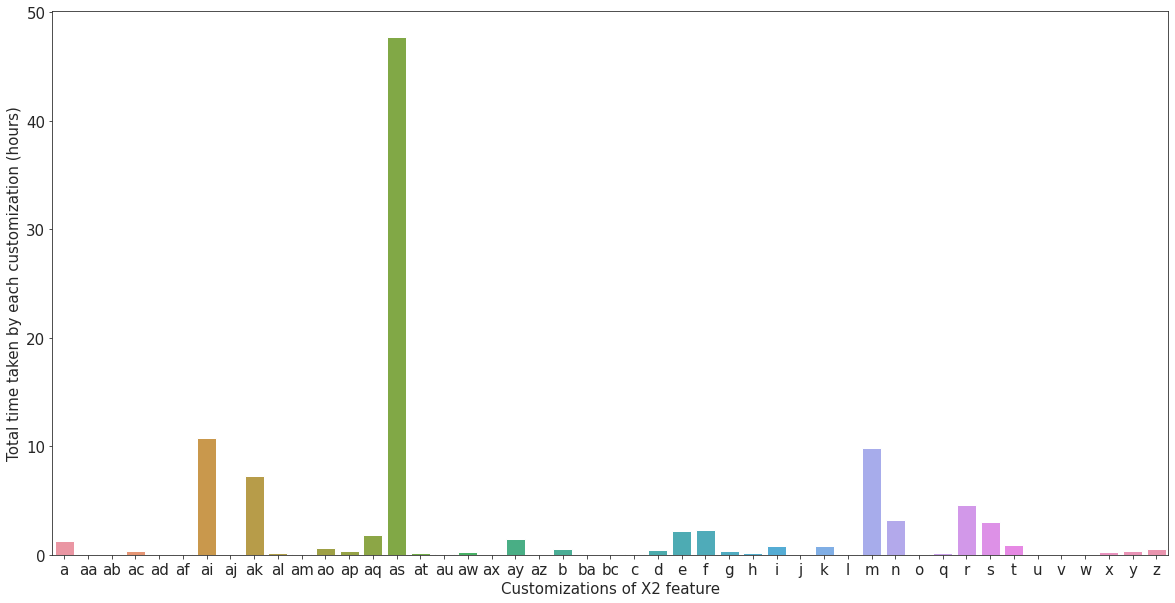

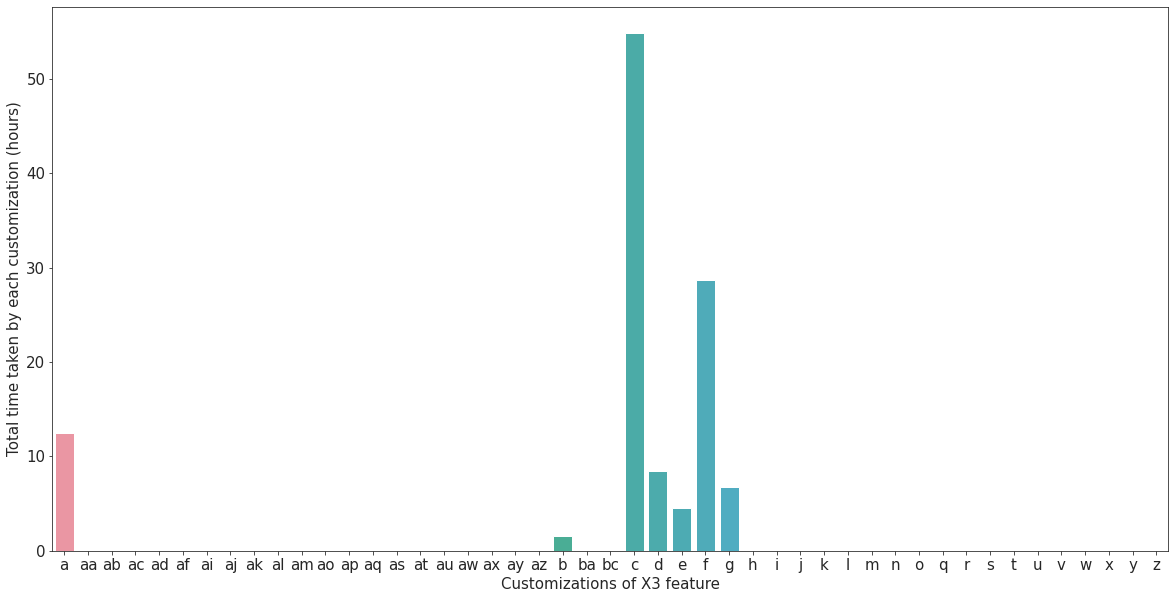

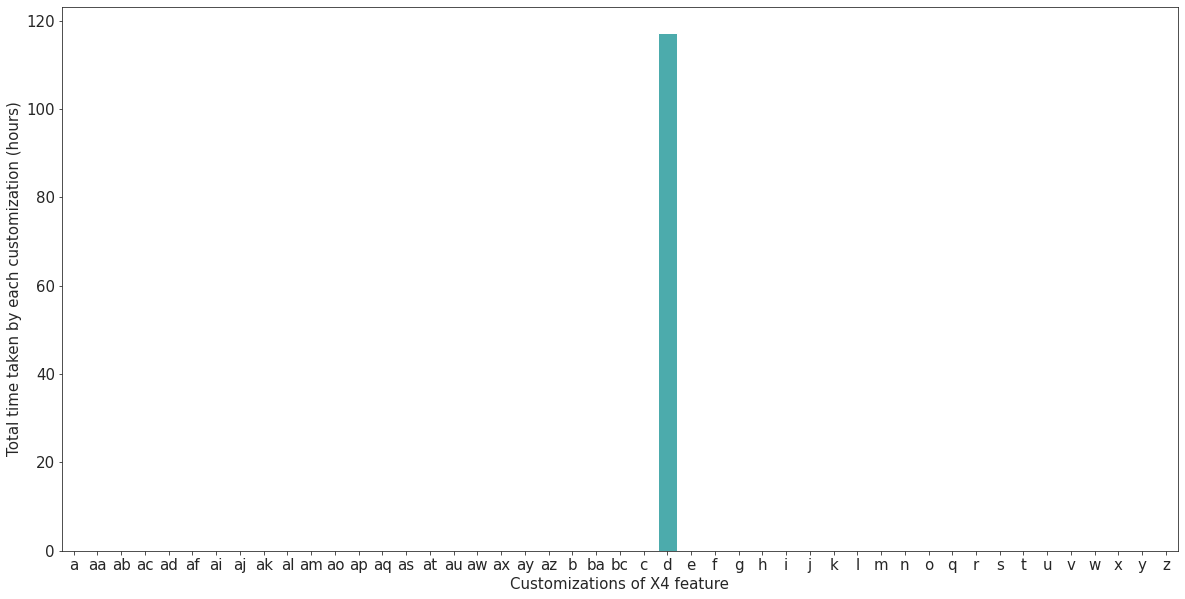

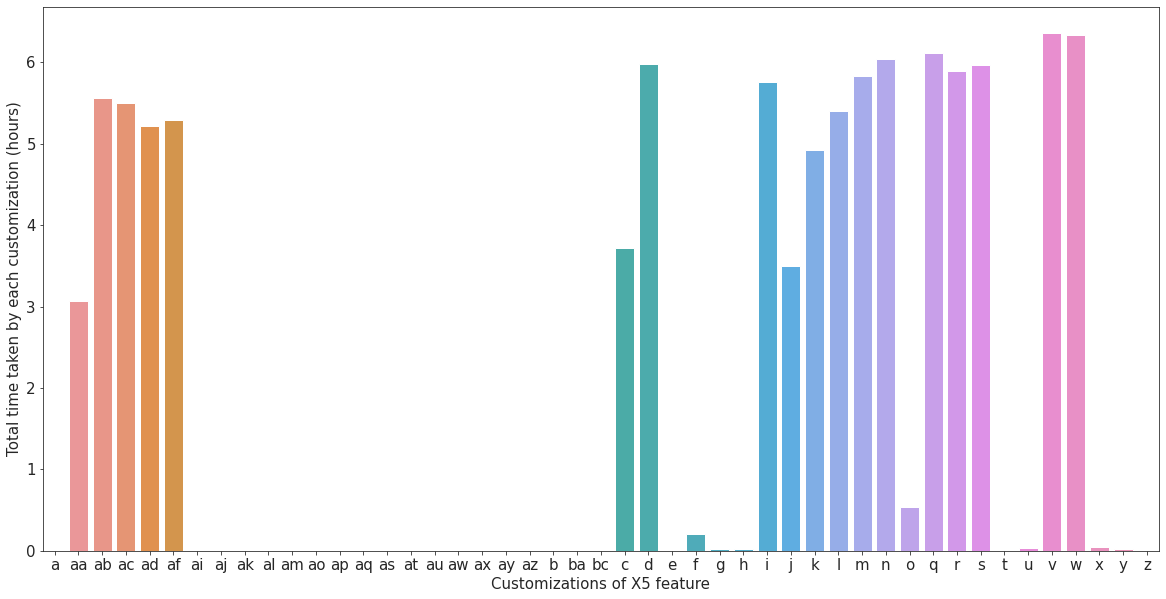

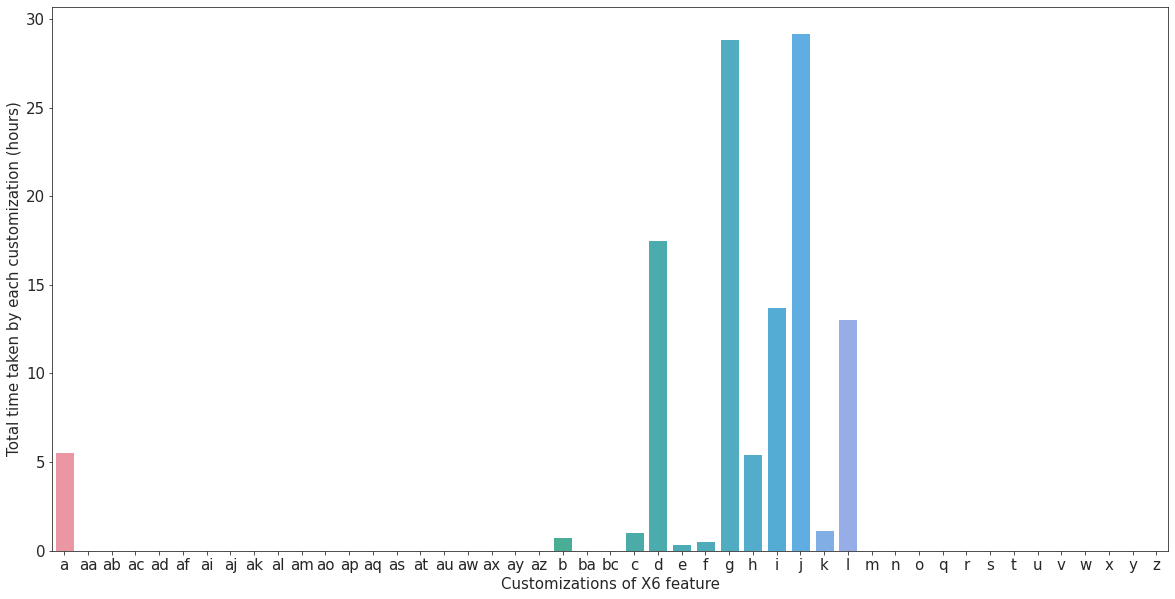

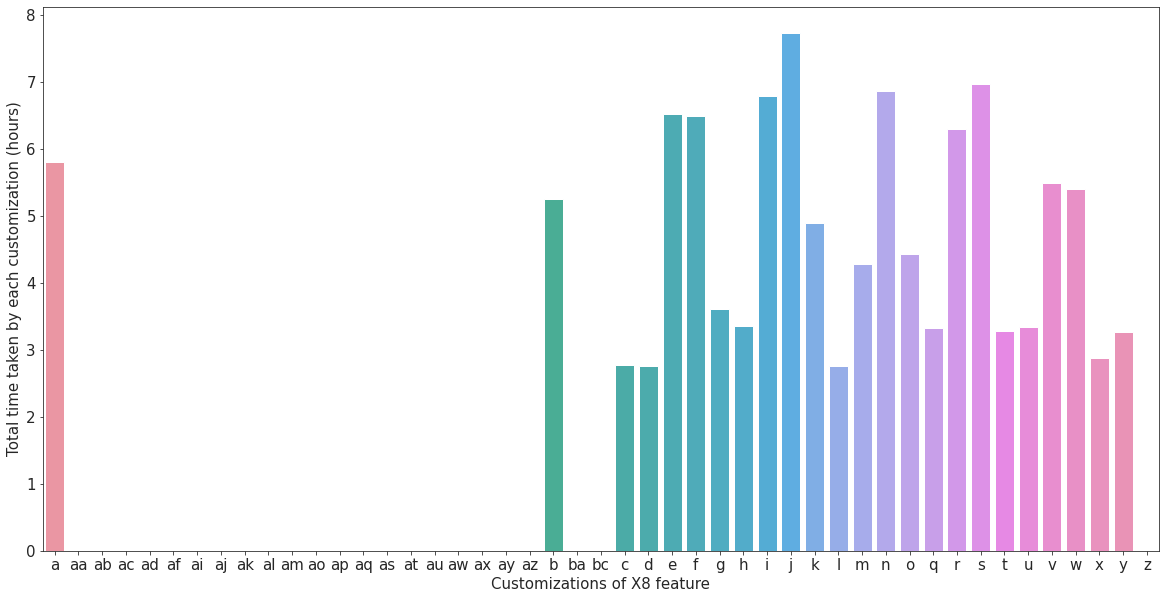

In [19]:
temp = pd.DataFrame(train.groupby('X0'))
for col in cat_features.astype('category'):
    sum_cust = {}
    for cust in temp.iloc[:,0]:
        sum = train['y'][train[col]== cust].sum()
        sum_cust[cust]=sum
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10 )
    result = {key: value / 3600 for key, value in sum_cust.items()}
    keys,values = result.keys(),result.values()
    sns.barplot(x = list(keys), y = list(values))
    plt.xlabel('Customizations of ' + str(col) + ' feature',fontsize=15)
    plt.ylabel('Total time taken by each customization (hours)',fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.show()

### Observation

1. From all of the plots it is observed that in feature X4 customization 'd' in total is taking very large amount of time upto 120 hrs. This is due the fact that almost all vehicles (4000 in count) consists of customization 'd' and also the test time of customization 'd' is also very large hence ending up with such a large total time.


2. In feature X2 'as' took most of the time from all the customizations. Hence it can be concluded that customization 'as' is used in most of the vehicles when we are giving feature X2 to the vehicle.


3. In feature 'X3' total time taken by 'c' is more and hence this customization defines X3 more.

## 4.4 Visualizing Categorical features by t-SNE

In [20]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

def plot_tsne(train, col, perpex=30, iters=1000):
    
    labels = train[col].unique()
    final_data_appended = []
    for idx,custom in enumerate(labels):
        
        dat = train.groupby(col).get_group(custom)
        
        if col == 'X0':
            dat.drop([ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X1':
            dat.drop([ 'X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X2':
            dat.drop([ 'X0', 'X1', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X3':
            dat.drop([ 'X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X4':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X5':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X6':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X8','ID','y'],axis=1,inplace=True)
        else:
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6','ID','y'],axis=1,inplace=True)
            
        dat.columns = dat.columns.str.replace(col, 'Labels')
        final_data_appended.append(dat)
    
    appended_data = pd.concat(final_data_appended).reset_index(drop=True)
    appended_data = shuffle(appended_data)

    data = appended_data.drop('Labels',axis=1)
    label = appended_data['Labels']
    standardized_data = StandardScaler().fit_transform(data)


    model = TSNE(n_components=2, perplexity= perpex,  n_iter = iters, random_state=0)
    # configuring the parameteres
    # the number of components = 2
    # default perplexity = 30
    # default learning rate = 200
    # default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(standardized_data)


    # creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, label)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    return tsne_df

## t-SNE for X0

#### Perplexity = 20

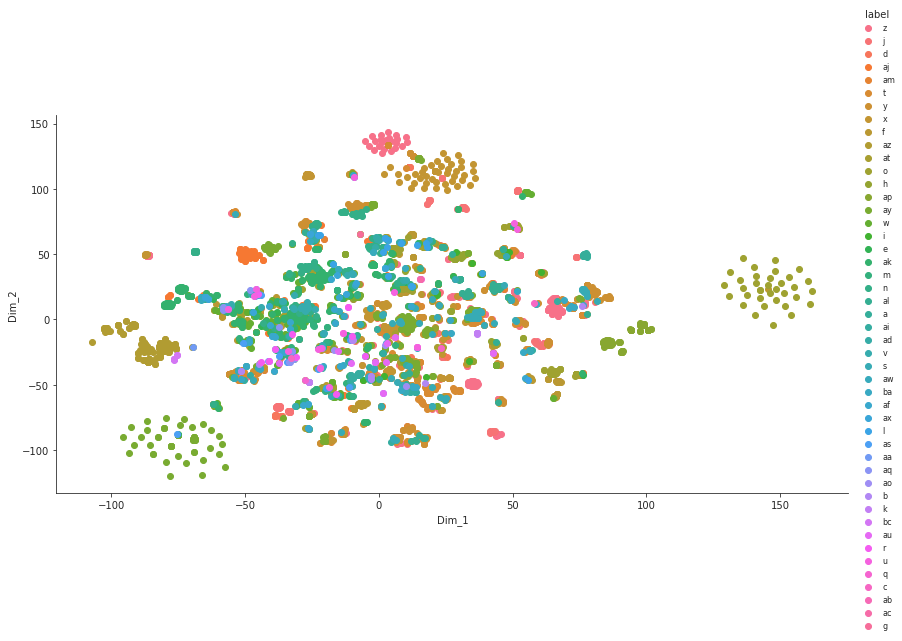

In [21]:
sns.FacetGrid(plot_tsne(train,'X0',20,1500), hue="label", height = 10 ,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perplexity = 30

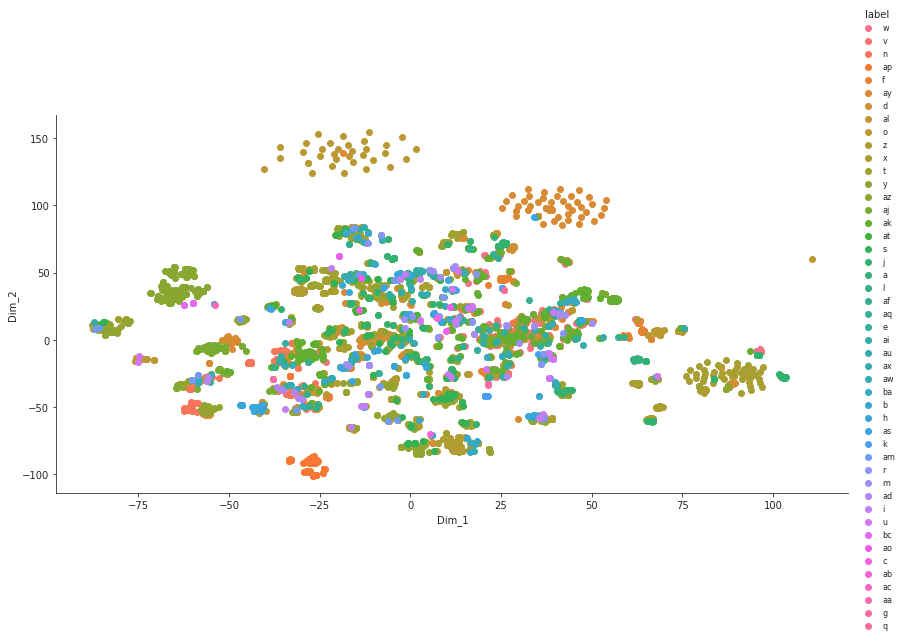

In [22]:
sns.FacetGrid(plot_tsne(train,'X0',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perplexity = 50

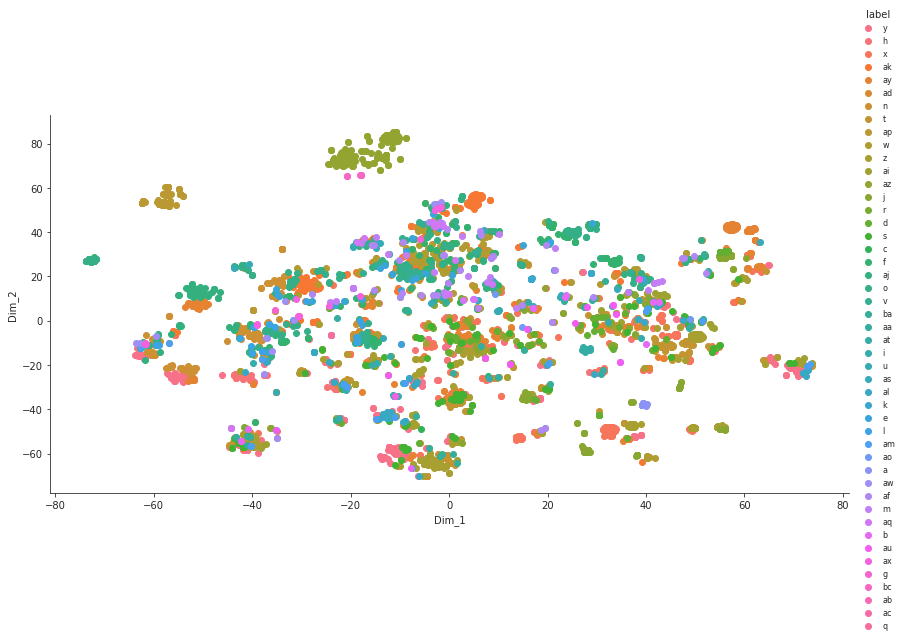

In [23]:
sns.FacetGrid(plot_tsne(train,'X0',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perplexity = 100

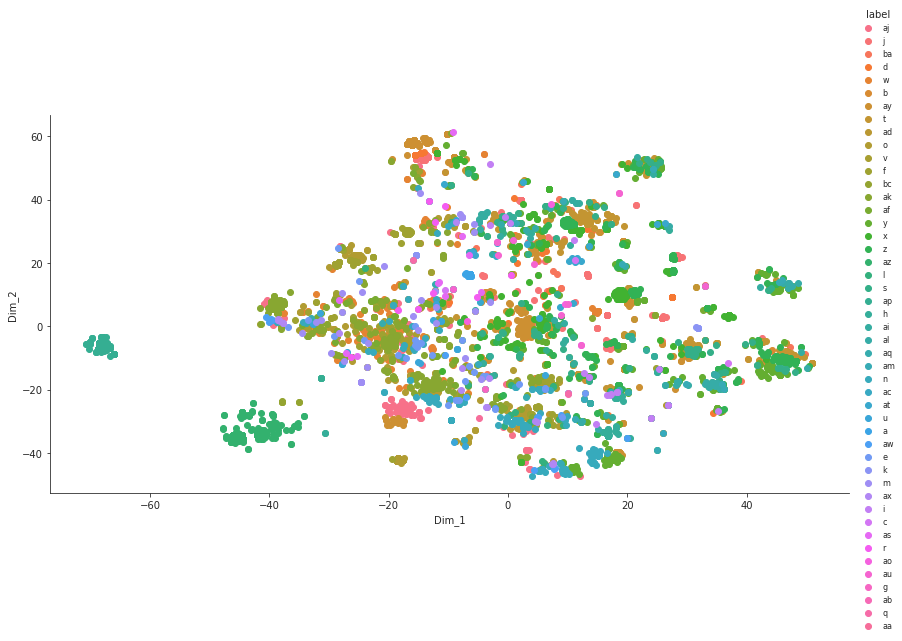

In [24]:
sns.FacetGrid(plot_tsne(train,'X0',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

### Observation

1. Perplexity 20 gives us 2 clusters at the top left and at right side (ay) dark green in color. We can also observe from the previous plots that counts for 'ay' customization was maximum for feature X0, so maybe this customization is different from other customizations and can be seperated and is important for feature selection.


2. With perplexity 30 again we are getting a seperate cluster orange in color named as 'ay'.


3. Perplexity 50 and 100 are not making any sense.

## t-SNE for X1

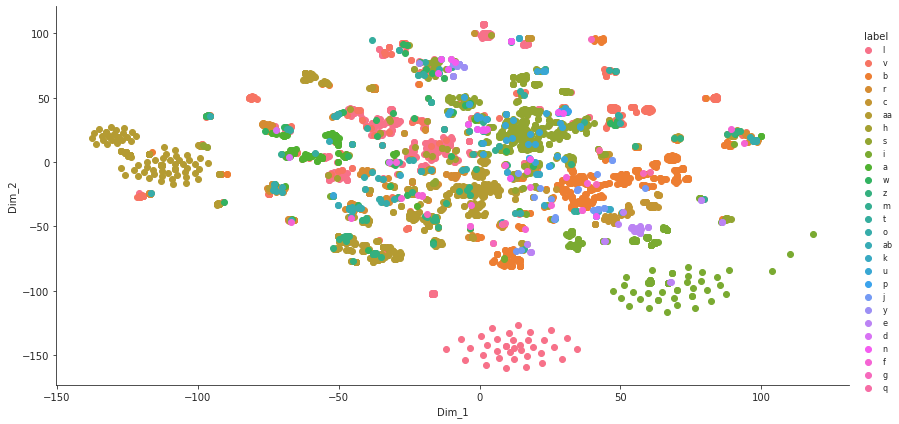

In [25]:
sns.FacetGrid(plot_tsne(train,'X1',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

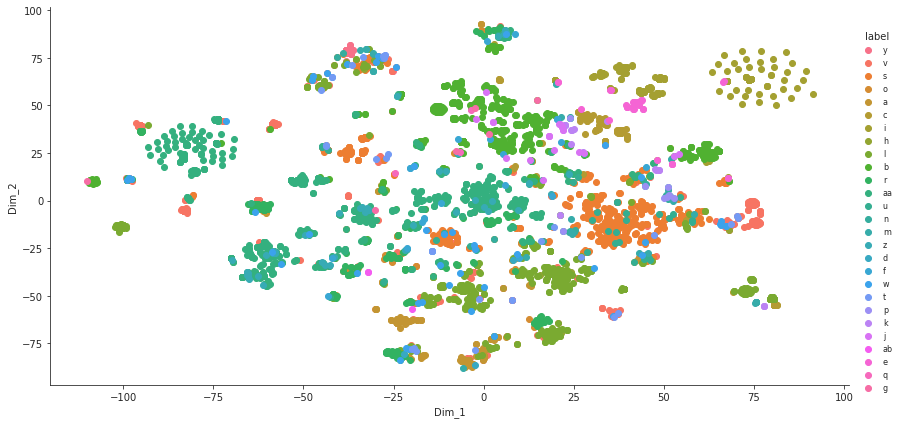

In [26]:
sns.FacetGrid(plot_tsne(train,'X1',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

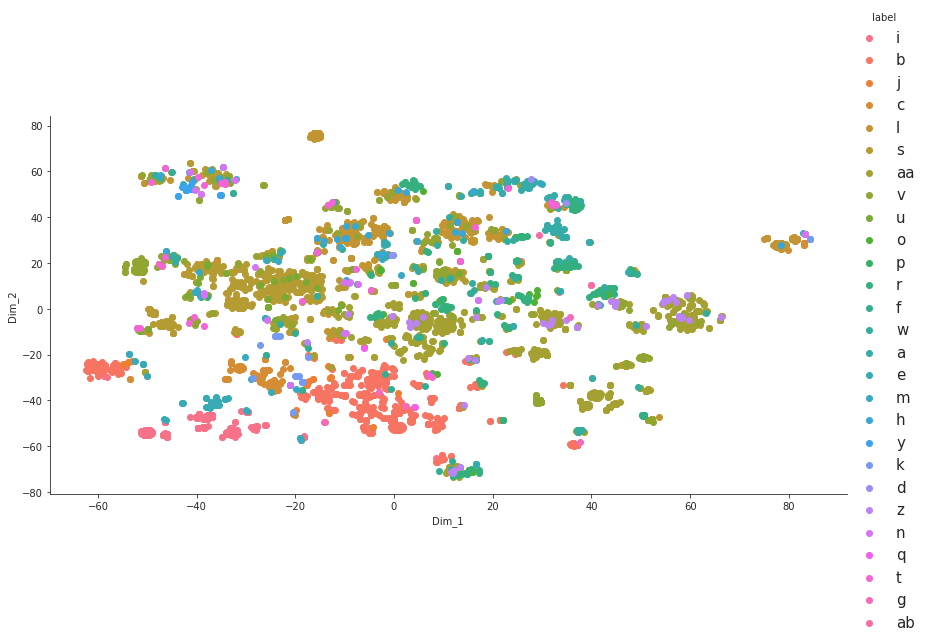

In [27]:
sns.FacetGrid(plot_tsne(train,'X1',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

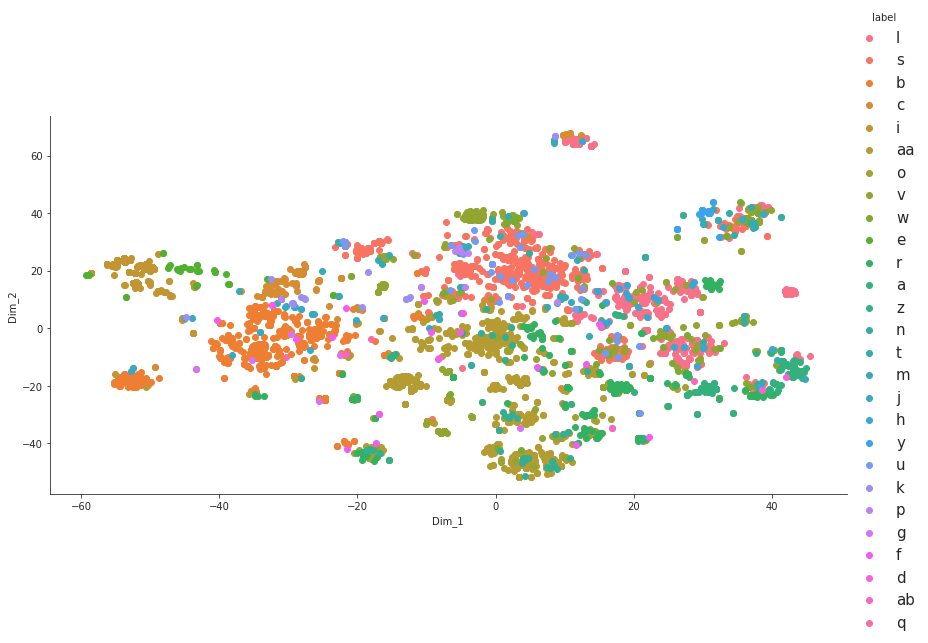

In [28]:
sns.FacetGrid(plot_tsne(train,'X1',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

1. Perplexity 20 gives us 2 clusters one at the top (s)  green in color and one at the right (aa) orange in color. We can also observe from the previous plots that counts for these two customizations were maximum for feature X1, so maybe these customizations are different from other customizations and can be seperated and are important for feature selection. Perplexity 20 is giving more information.


2. With perplexity 30 again we are getting seperate clusters named as 'ab' and 'c'.



## t-SNE for X2

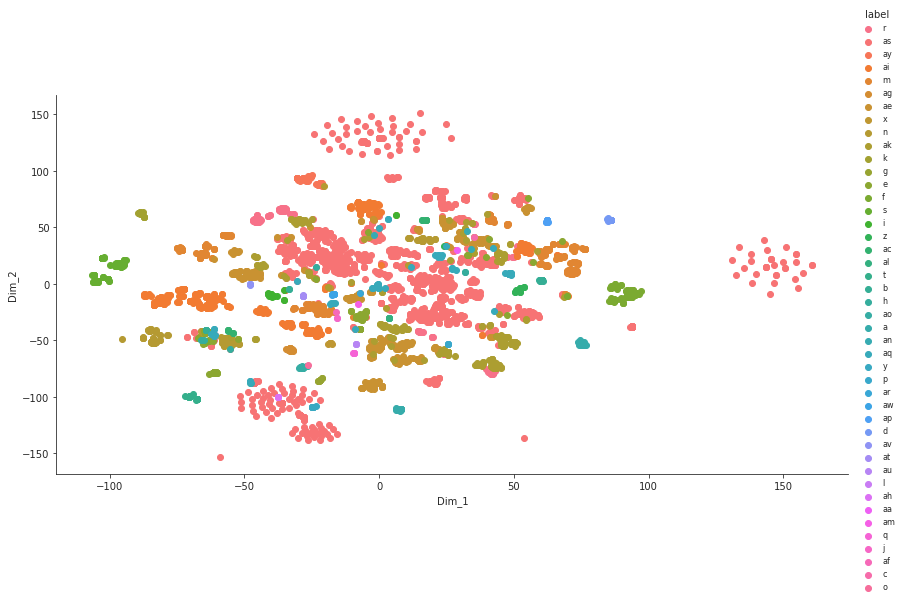

In [29]:
sns.FacetGrid(plot_tsne(train,'X2',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

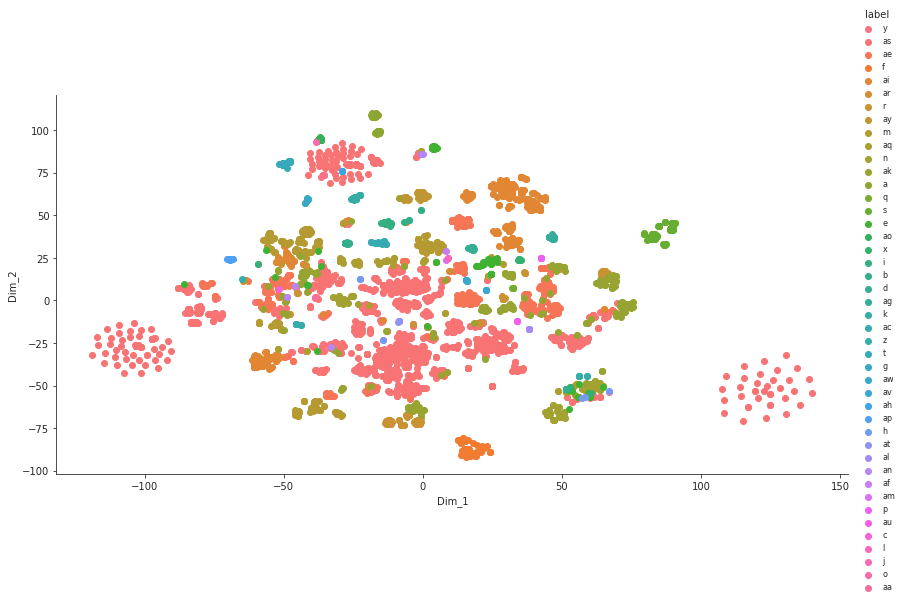

In [30]:
sns.FacetGrid(plot_tsne(train,'X2',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

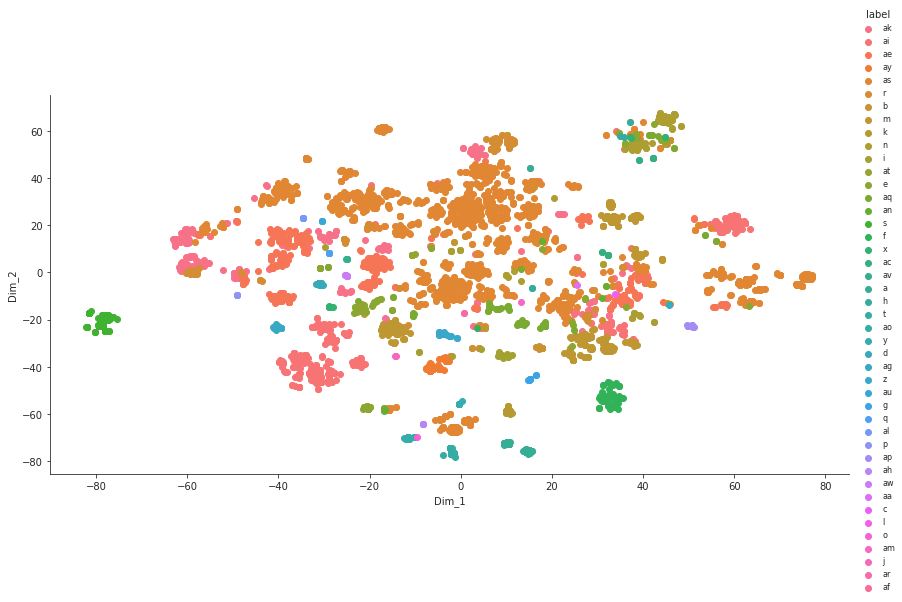

In [31]:
sns.FacetGrid(plot_tsne(train,'X2',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

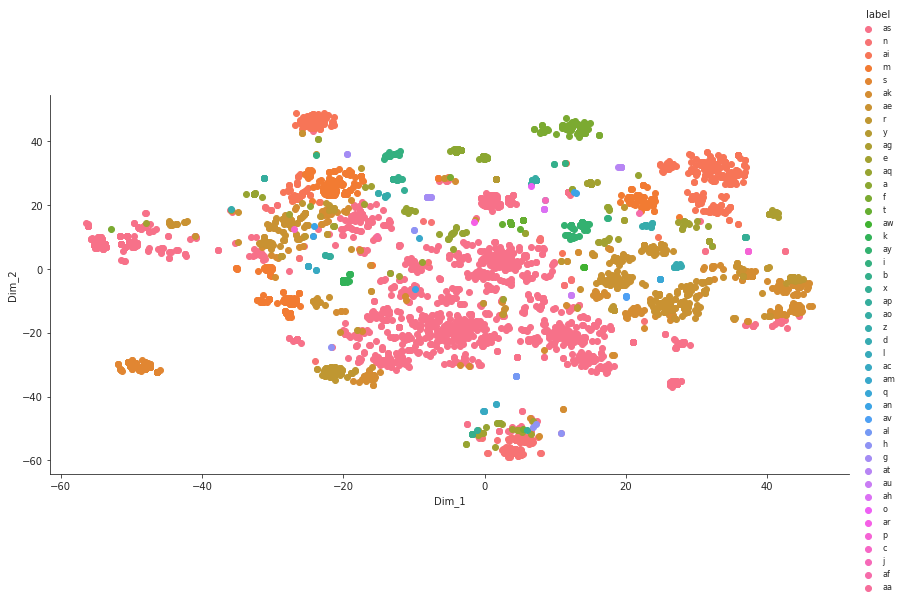

In [32]:
sns.FacetGrid(plot_tsne(train,'X2',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

### Observation

1. From the data is obvious that most of the points belongs to 'as' customization.


2. Perplexity 100 is doing a decent job to seperate the olive colored cluster ('ak') from orange ('as') which is clustered in center and is far more better than the other perplexity values. 

### t-SNE for X3

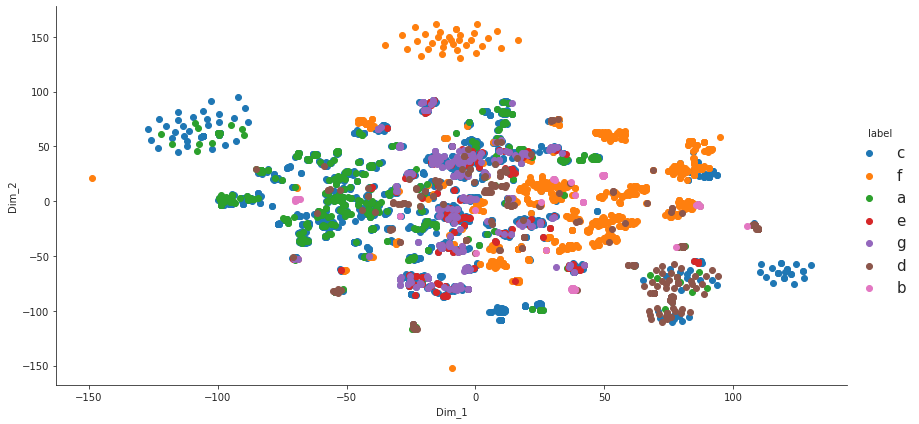

In [33]:
sns.FacetGrid(plot_tsne(train,'X3',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

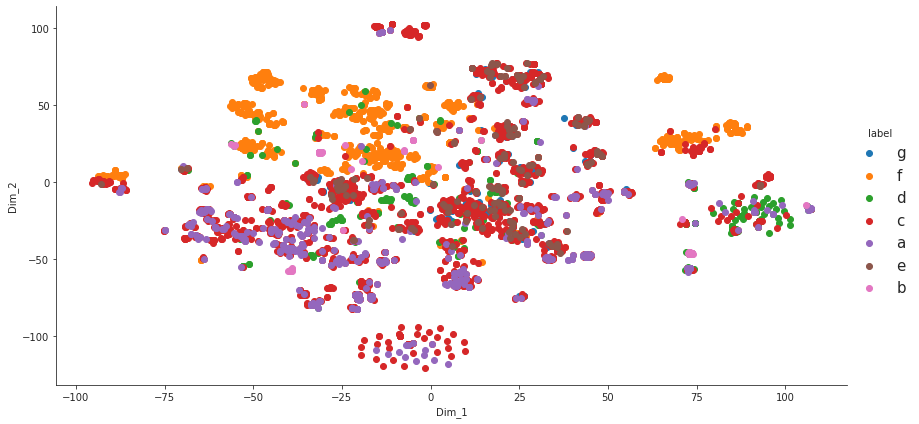

In [34]:
sns.FacetGrid(plot_tsne(train,'X3',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

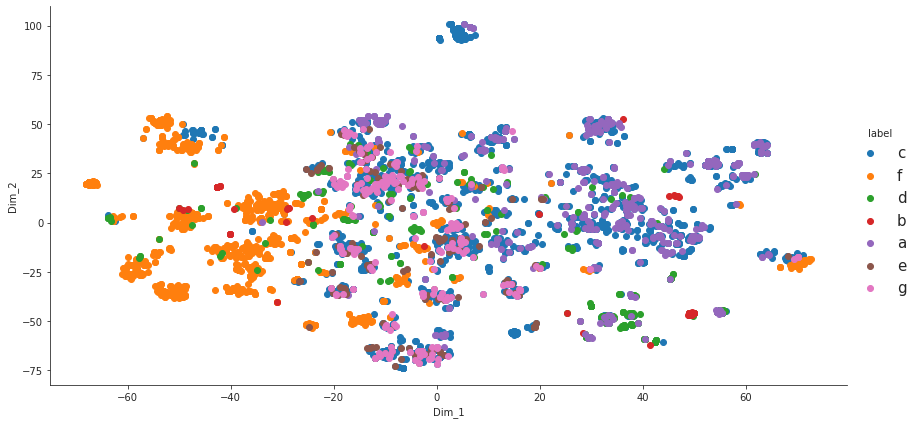

In [35]:
sns.FacetGrid(plot_tsne(train,'X3',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

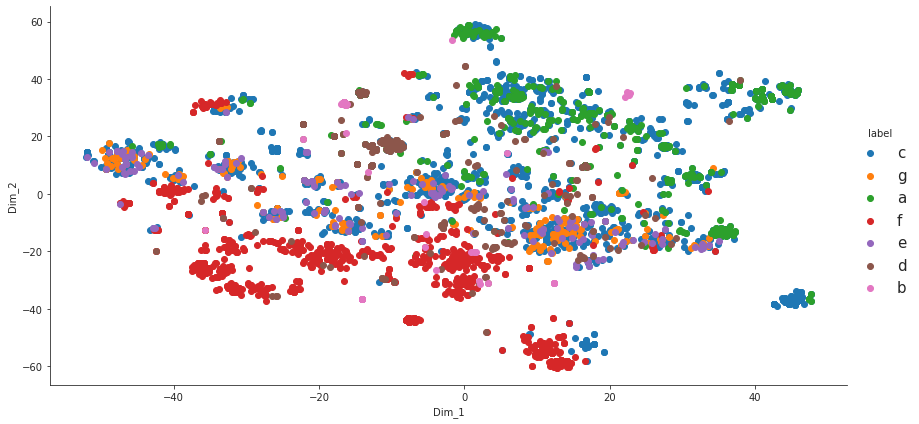

In [36]:
sns.FacetGrid(plot_tsne(train,'X3',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

1. t-SNE with perplexity 20 is doing great job and we can se orange ('f'), blue ('c'), red ('a') and green ('d') clusters   


2. Whereas with perplexity 30 we can only observe orange ('c') and green ('f') clusters to be seperated.


3. Perplexity 50 is seperating red ('f') from green ('a') and perplexity 100 is also seperating orange ('f') from others.


4. This means that the customization 'f' is seperated and different from each others for every perplexity value.

## t-SNE for X4

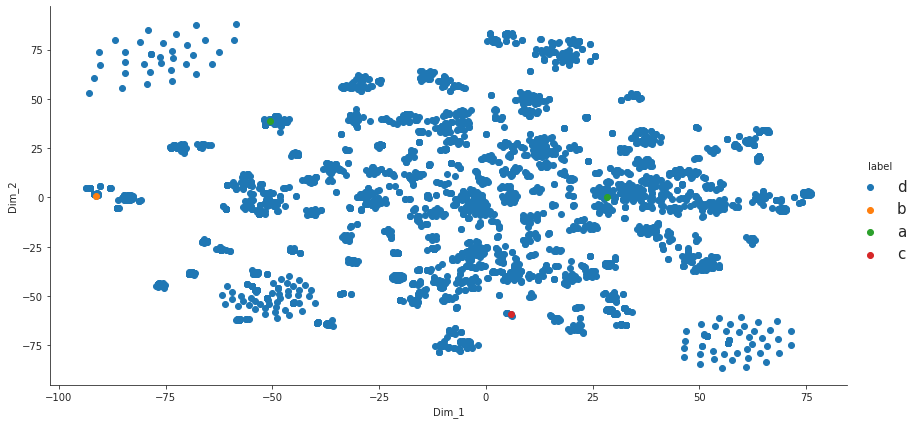

In [37]:
sns.FacetGrid(plot_tsne(train,'X4'), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

So there is only a orange cluster that means the variance for this feature is very low.

### t-SNE for X5

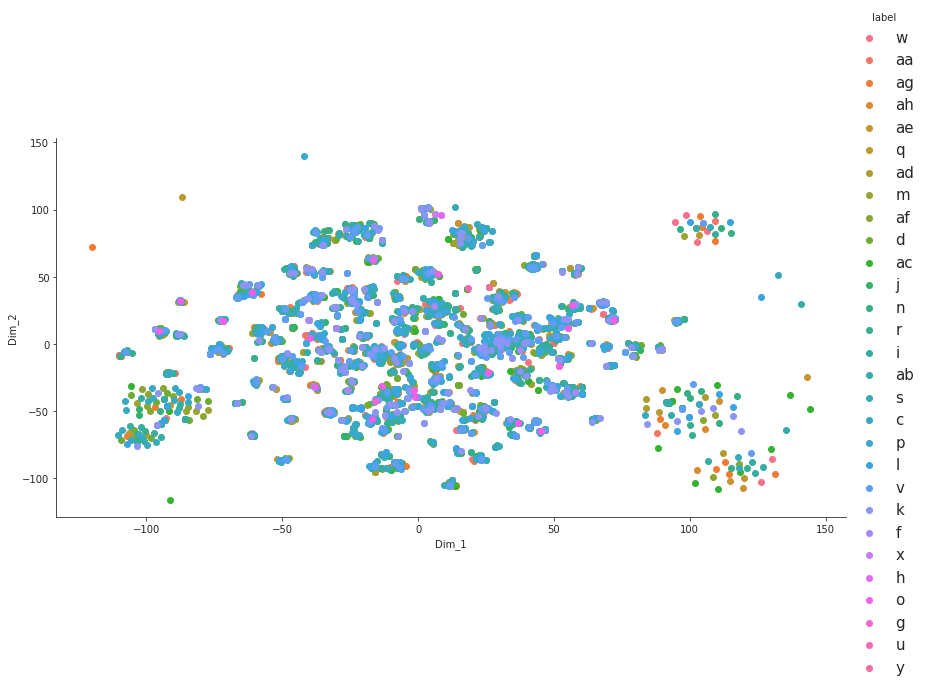

In [38]:
sns.FacetGrid(plot_tsne(train,'X5',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

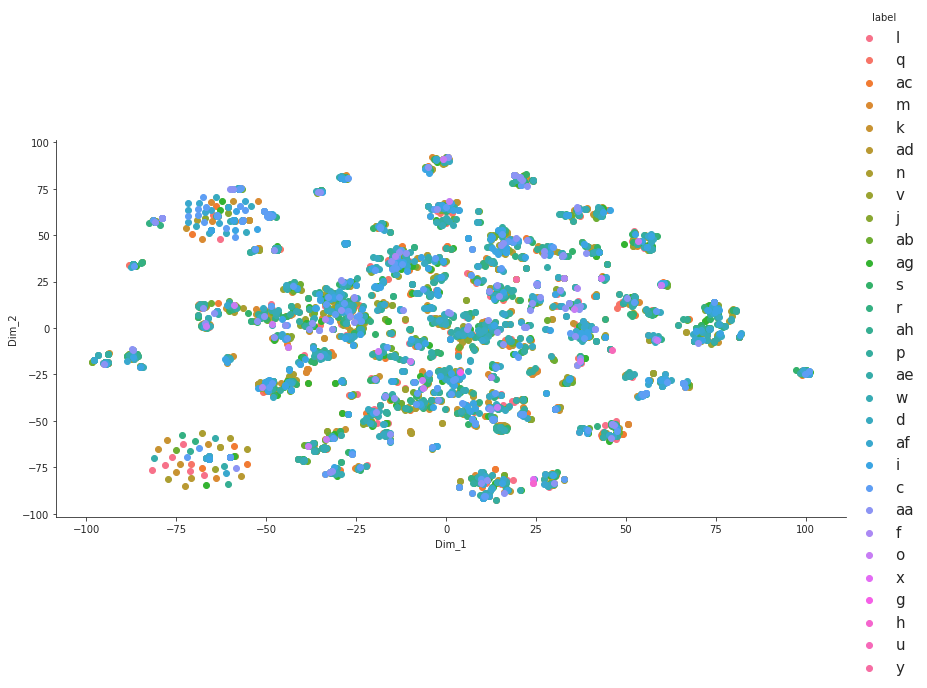

In [39]:
sns.FacetGrid(plot_tsne(train,'X5',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

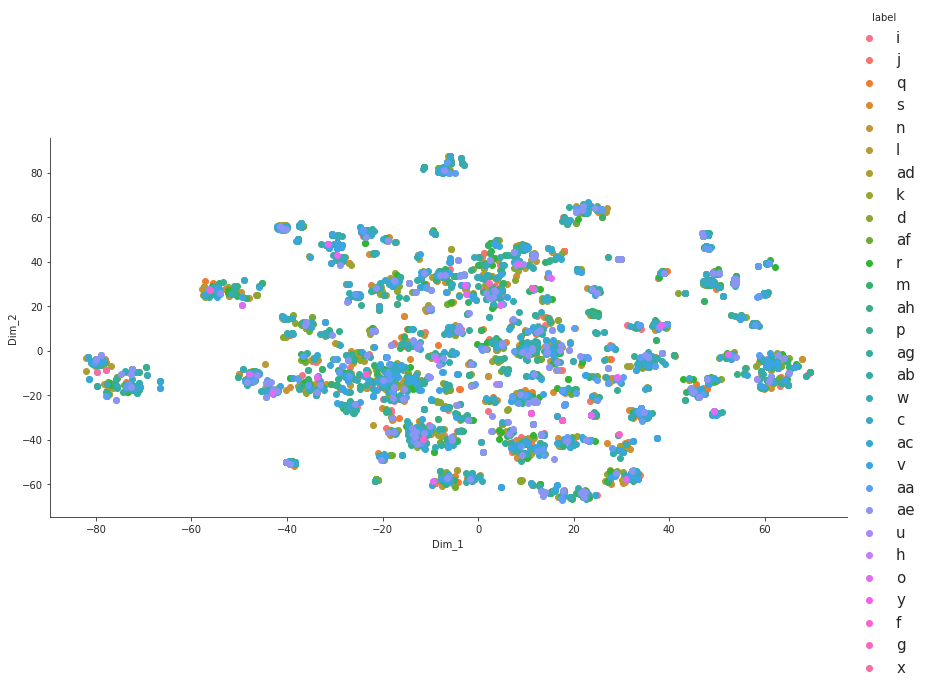

In [40]:
sns.FacetGrid(plot_tsne(train,'X5',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

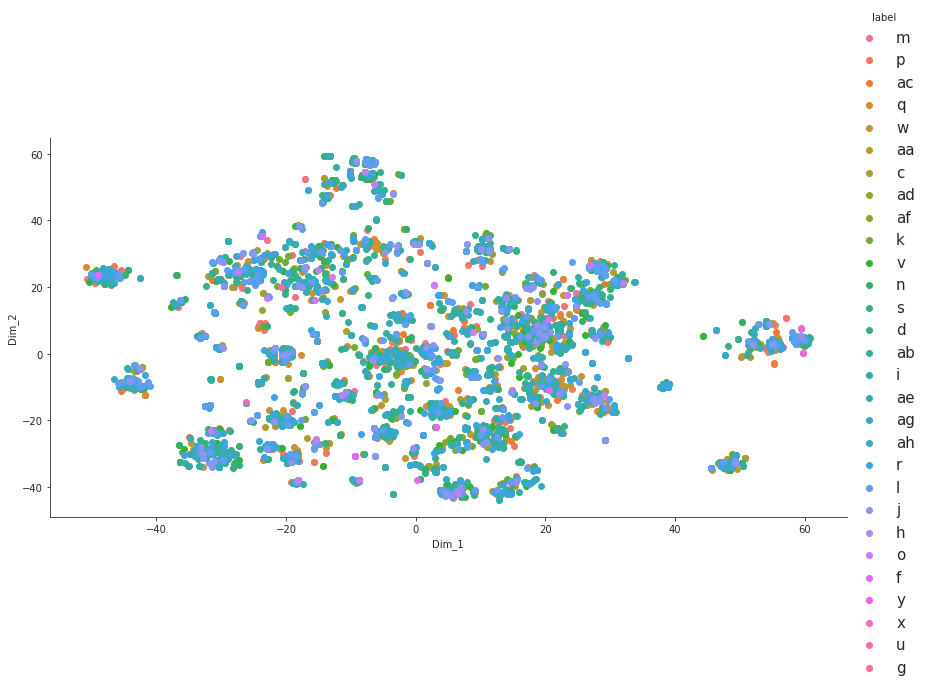

In [41]:
sns.FacetGrid(plot_tsne(train,'X5',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

All the points are scattered and no one cluster can be fornmed and hence no observation can be made for feature 'X5'.

### t-SNE for X6

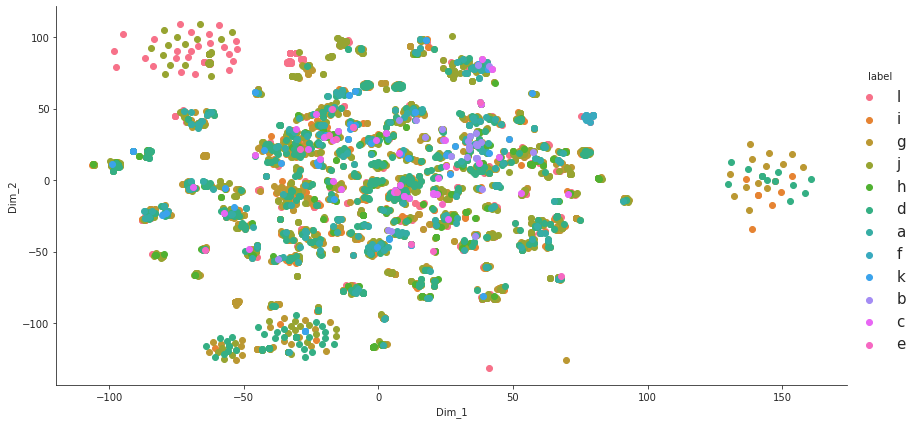

In [42]:
sns.FacetGrid(plot_tsne(train,'X6',20,1500), hue="label", height = 20,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

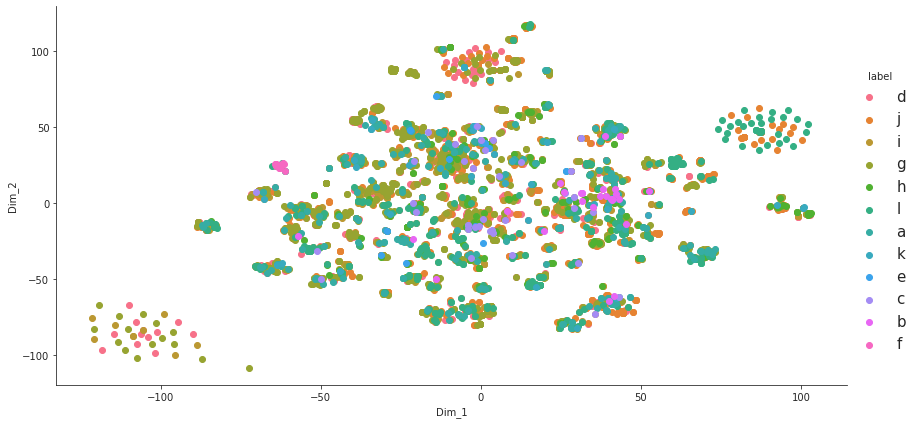

In [43]:
sns.FacetGrid(plot_tsne(train,'X6',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

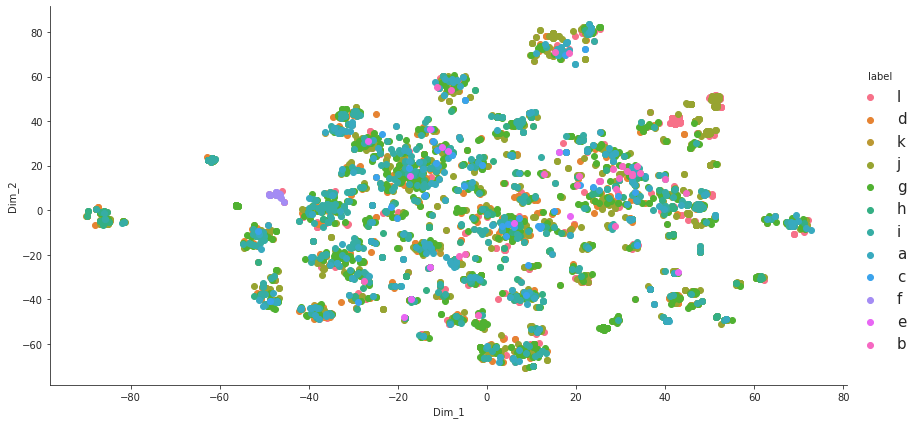

In [44]:
sns.FacetGrid(plot_tsne(train,'X6',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

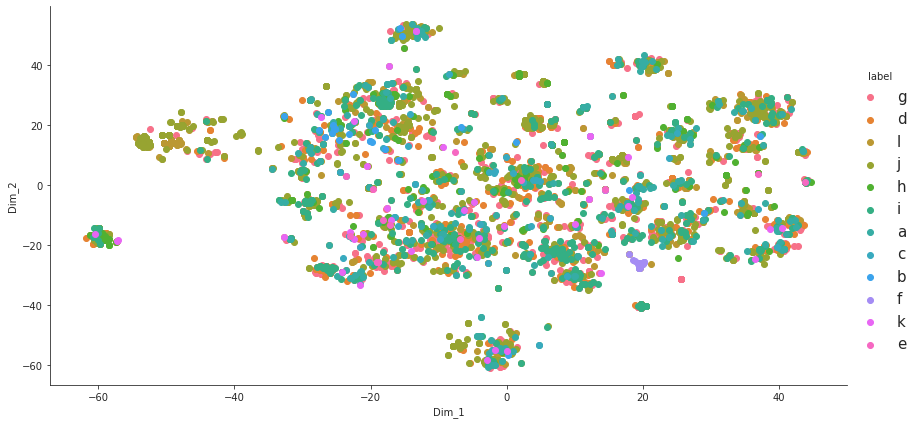

In [45]:
sns.FacetGrid(plot_tsne(train,'X6',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

For perplexity 20 only purple cluster at the bottom named as 'c' and blue cluster ('e') can be seperated.

### t-SNE for X8

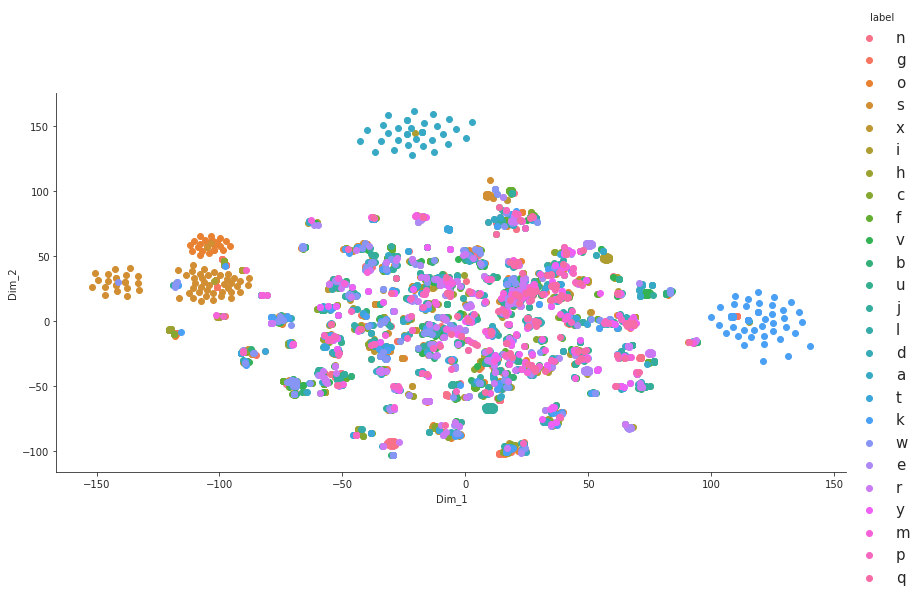

In [46]:
sns.FacetGrid(plot_tsne(train,'X8',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                    map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

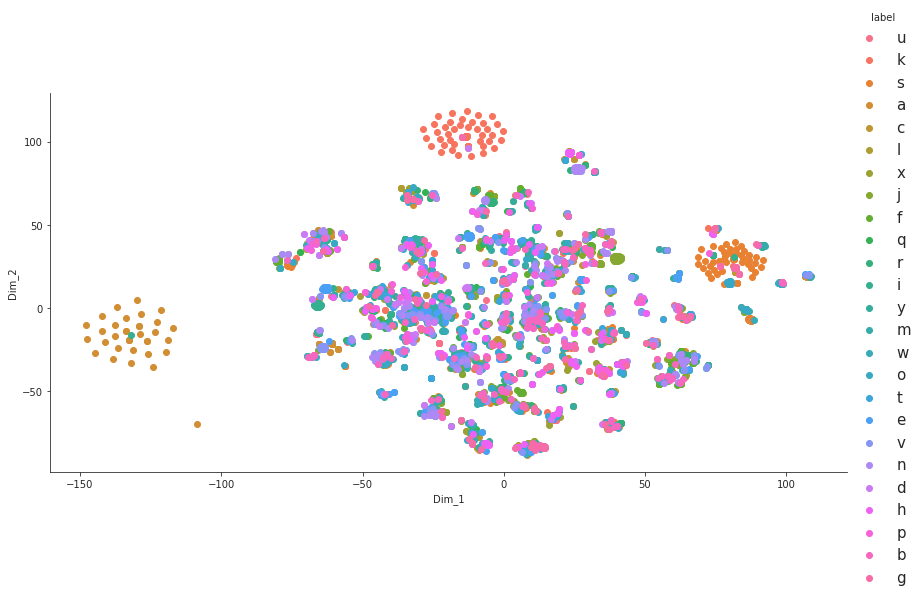

In [47]:
sns.FacetGrid(plot_tsne(train,'X8',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

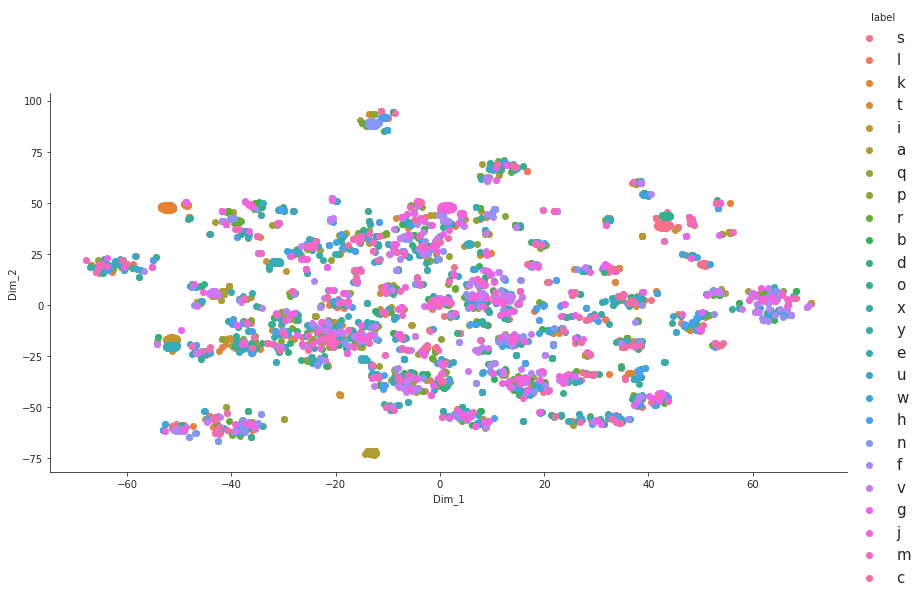

In [48]:
sns.FacetGrid(plot_tsne(train,'X8',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                                map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

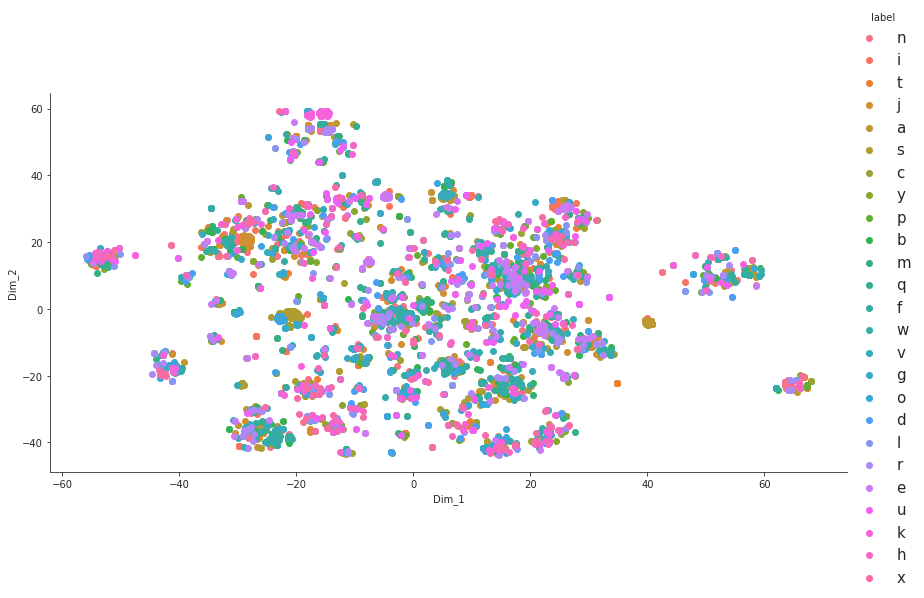

In [49]:
sns.FacetGrid(plot_tsne(train,'X8',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                                    map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observations

1. With perplexity 20 blue cluster at top ('e') and olive cluster at top right ('s') are seperable from other customizations.


2. With perplexity 30 light green cluster at right ('k') and olive cluster at left ('s') are seperable from other customizations.


3. From the observation we can infer that customization 's' is different from other customizations for feature X8.

## 5. Binary Feature Analysis and Dimensionality Reduction

In [50]:
#extracting only binary features
binary_features = train.columns.drop(['ID', 'y'] + list(cat_features))
binary_features

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

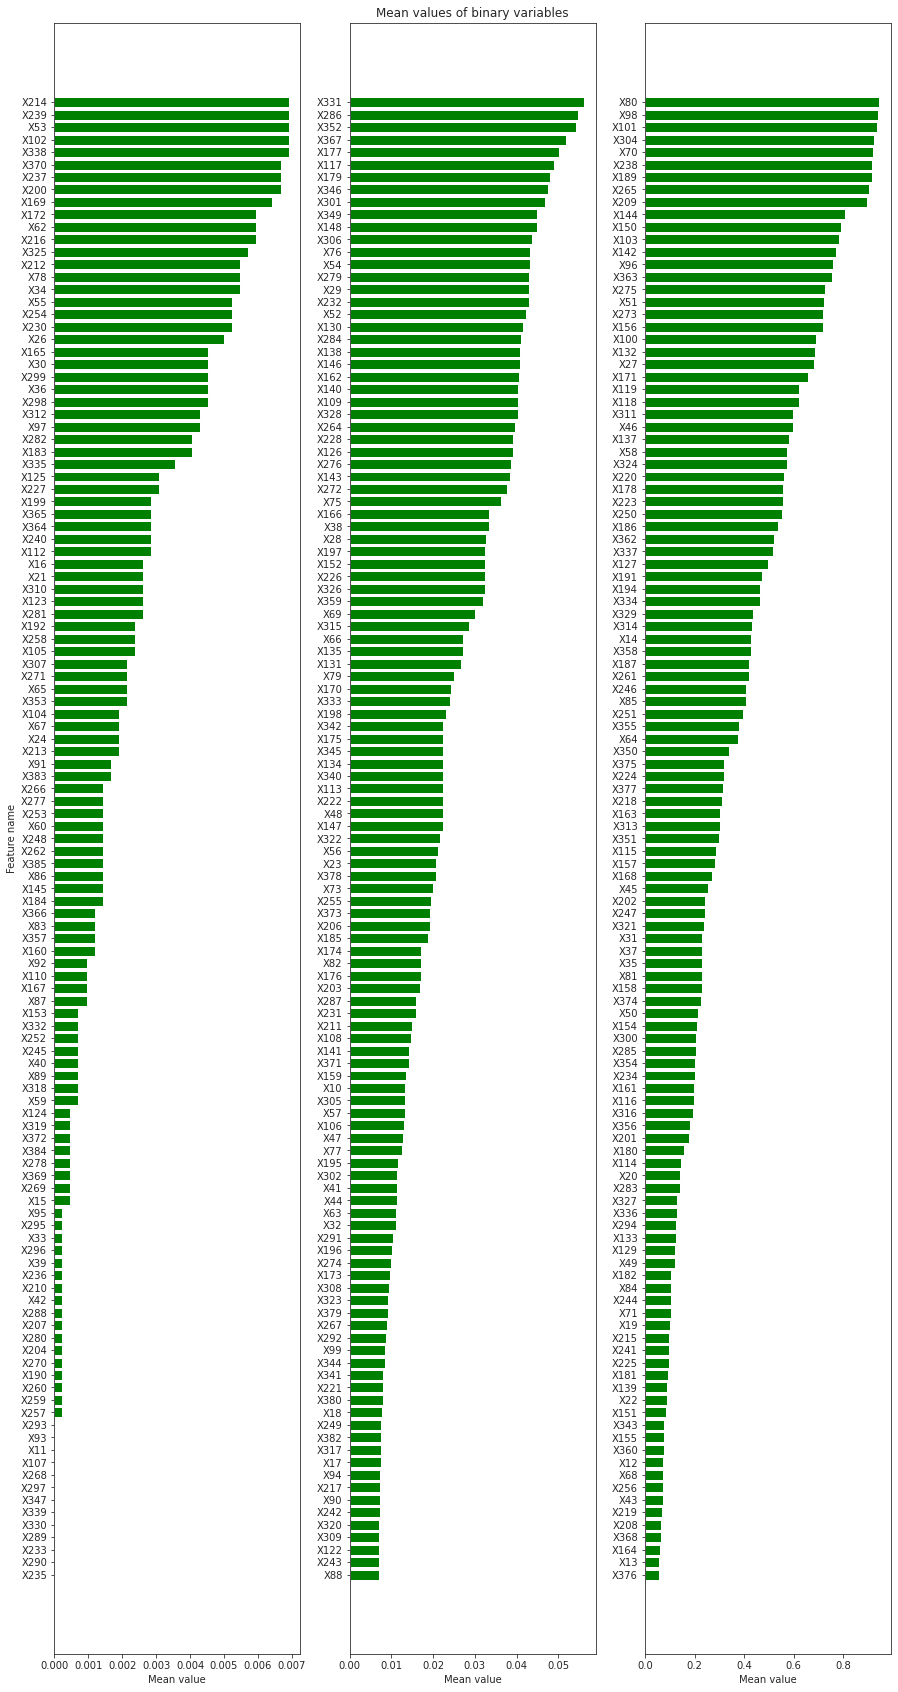

In [51]:
#reference : https://www.kaggle.com/code/eryash15/mercedes-eda-xgboost-testline?scriptVersionId=79247253&cellId=14

binary_means = [np.mean(train[c]) for c in binary_features]
binary_names = np.array(binary_features)[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(15,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color='green')
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

<h5>Above plot gives us the mean value of the 0's and 1's present in a binary feature. Features which are close to 0 mean or less than 0.5 gives us an idea that the feature contains most of the values as 0's in it and features close to 1 like X80 tells us that the feature contains mostly 1's. The counts of 0's and 1's in each of the feature is shown in the below plot.<h5/>
 

In [52]:
# Integer Columns Analysis
unique_value_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

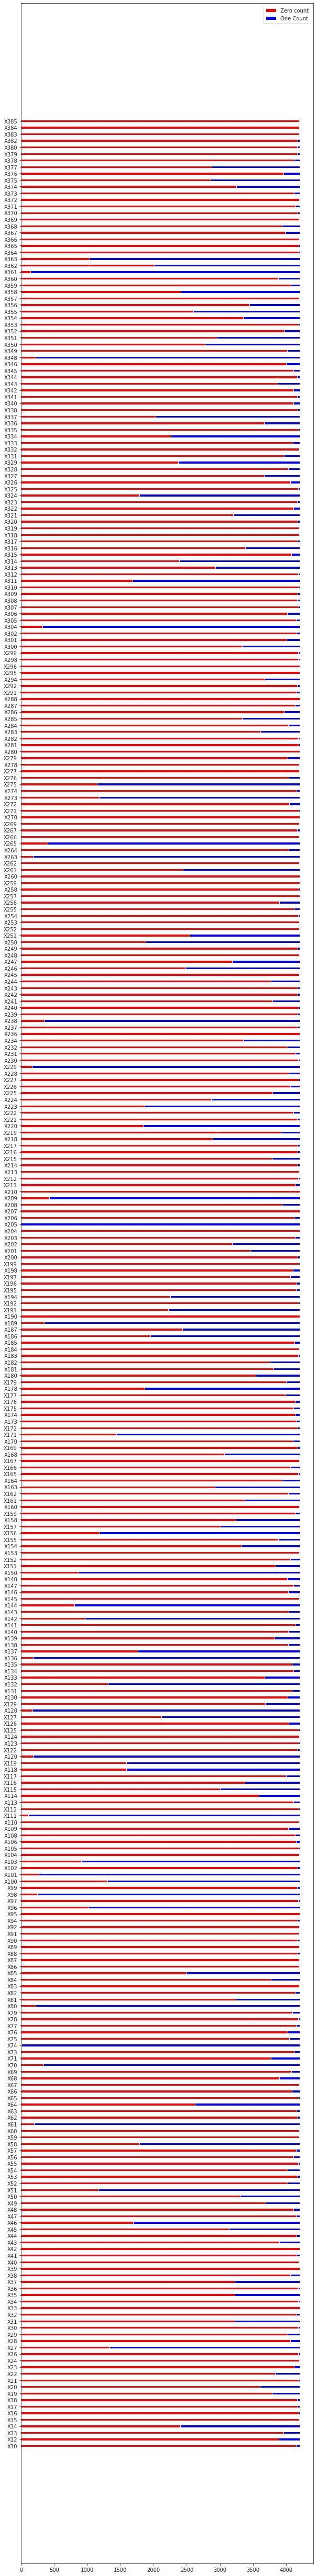

In [53]:
#https://www.kaggle.com/code/tarunsolanki/mercedes-benz-simple-eda?scriptVersionId=69244721&cellId=30

#calculating the sum of 0/s and 1's in all binary_features

zero_list=[]
one_list=[]
col_list = unique_value_dict['[0, 1]']
for col in col_list:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
l = len(col_list)
arr = np.arange(l)
width = 0.35
plt.figure(figsize=(10,90))
plot_1 = plt.barh(arr, zero_list, width, color='red')
plot_2 = plt.barh(arr, one_list, width, left=zero_list, color="blue")
plt.yticks(arr, col_list)
plt.legend((plot_1[0], plot_2[0]), ('Zero count', 'One Count'))
plt.show()

<h5>From the the above plot and the binary mean plot it can be seen that most of the features consists of 0's in them.<h5/>

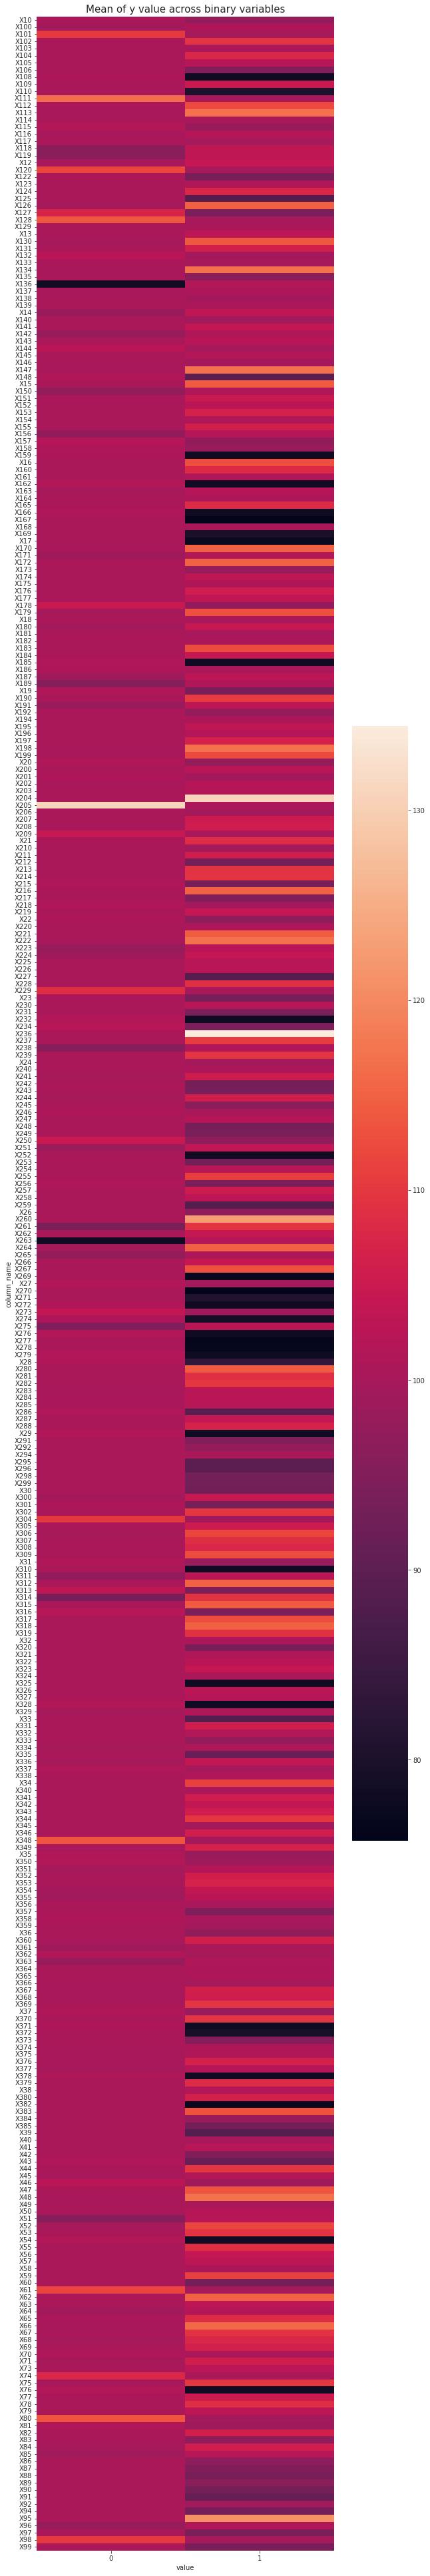

In [54]:
#reference: https://www.kaggle.com/code/tarunsolanki/mercedes-benz-simple-eda?scriptVersionId=69244721&cellId=31

zero_mean_list = []
one_mean_list = []
cols_list = unique_value_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train.loc[train[col]==0].y.mean())
    one_mean_list.append(train.loc[train[col]==1].y.mean())
new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + \
                                                               [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(10,70))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

<h5>Above plot shows us the mean value of test time ('y') for a vehicle in which a binary feature is present or not.<h5/>
<h5>Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive and the count distribution is also good between both the classes (can be seen from the previous graph).<h5/>

#### Checking Variance

In [55]:
binary_train_data = train[binary_features]
print(binary_train_data.shape)
binary_train_data.head(3)

(4201, 368)


X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...  X375  X376  X377  \
0    0    0    0    1    0    0    0    0    1    0  ...     0     0     1   
1    0    0    0    0    0    0    0    0    1    0  ...     1     0     0   
2    0    0    0    0    0    0    0    1    0    0  ...     0     0     0   

   X378  X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     1     0     0     0  

[3 rows x 368 columns]

In [56]:
var = []
for f in binary_features:
    v = binary_train_data[f].var()
    var.append((f,v))

# Convert the list of tuples of feature and respective variance into dictionary
var_dict = dict(var)

In [57]:
var_df = pd.DataFrame(var_dict.keys(), columns=['feature'])
var_df['variance'] = var_dict.values()
# let's sort the dataframe by variance
var_df.head()

feature  variance
0     X10  0.013156
1     X11  0.000000
2     X12  0.068971
3     X13  0.054510
4     X14  0.244908

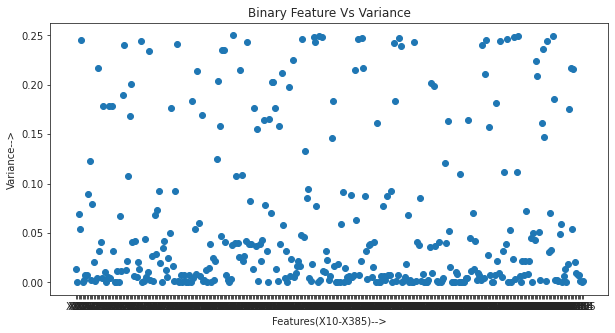

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(var_df['feature'], var_df['variance'])
plt.title("Binary Feature Vs Variance")
plt.xlabel("Features(X10-X385)-->")
plt.ylabel("Variance-->")
plt.show()

- Above scatter plot tells us that there are many values which are having 0 variance.

Let's check for the features which are having 0 variance

### 5.1 Searching Zero variance and Highly correlated features and dropping them 

In [59]:
#searching for the features having zero variance 
zero_var_cols = binary_features[train[binary_features].var()==0]
print('='*50)
print('Columns which have zero variance are :\n {}'.format(zero_var_cols))
print('='*50)

#dropping zero var features
featured_train = train.drop(zero_var_cols,axis=1)
featured_test = test.drop(zero_var_cols,axis=1)
print('Train columns of new dataframe after removing zero variance columns are: {}'.format(featured_train.shape[1]))
print('Test columns of new dataframe after removing zero variance columns are: {}'.format(featured_test.shape[1]))

Columns which have zero variance are :
 Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X339', 'X347'],
      dtype='object')
Train columns of new dataframe after removing zero variance columns are: 365
Test columns of new dataframe after removing zero variance columns are: 364


In [60]:
#Reference: https://stackoverflow.com/a/52509954/19790968

#searching features which have 98% of the correlation with each other
corr_cols = train[binary_features].corr(method='pearson')
upper = corr_cols.where(np.triu(np.ones(corr_cols.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.98)]

#dropping highly correlated features
featured_train.drop(to_drop_corr,axis=1,inplace=True)
featured_test.drop(to_drop_corr,axis=1,inplace=True)
print('='*50)
print('Train and Test Columns which are highly correlated are :\n {}'.format(to_drop_corr))
print('='*50)

Train and Test Columns which are highly correlated are :
 ['X35', 'X37', 'X39', 'X54', 'X76', 'X84', 'X90', 'X94', 'X102', 'X113', 'X119', 'X122', 'X129', 'X134', 'X137', 'X140', 'X146', 'X147', 'X172', 'X198', 'X199', 'X213', 'X214', 'X215', 'X216', 'X217', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X253', 'X254', 'X262', 'X263', 'X264', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X348', 'X352', 'X360', 'X363', 'X364', 'X365', 'X368', 'X370', 'X371', 'X382', 'X385']


In [61]:
#removing feature X4 
remove_cat_col = 'X4'
featured_train.drop(remove_cat_col,axis=1,inplace=True)
featured_test.drop(remove_cat_col,axis=1,inplace=True)

In [62]:
print('='*100)
print('Number of columns of original Train dataframe are: {}'.format(train.shape[1]))
print('Number of columns of original Test dataframe are: {}'.format(test.shape[1]))
print('='*100)
print('Number of columns of new Train dataframe after removing Zero Variance ,Highly Correlated columns and Categorical \
                                                                            features are: {}'.format(featured_train.shape[1]))
print('Number of columns of new Test dataframe after removing Zero Variance ,Highly Correlated columns and Categorical \
                                                                            features are: {}'.format(featured_test.shape[1]))
print('='*100)
print('Total Features Removed : {}'.format(train.shape[1]-featured_train.shape[1]))

Number of columns of original Train dataframe are: 378
Number of columns of original Test dataframe are: 377
Number of columns of new Train dataframe after removing Zero Variance ,Highly Correlated columns and Categorical                                                                             features are: 301
Number of columns of new Test dataframe after removing Zero Variance ,Highly Correlated columns and Categorical                                                                             features are: 300
Total Features Removed : 77


### 5.2 Feature Importance of binary features

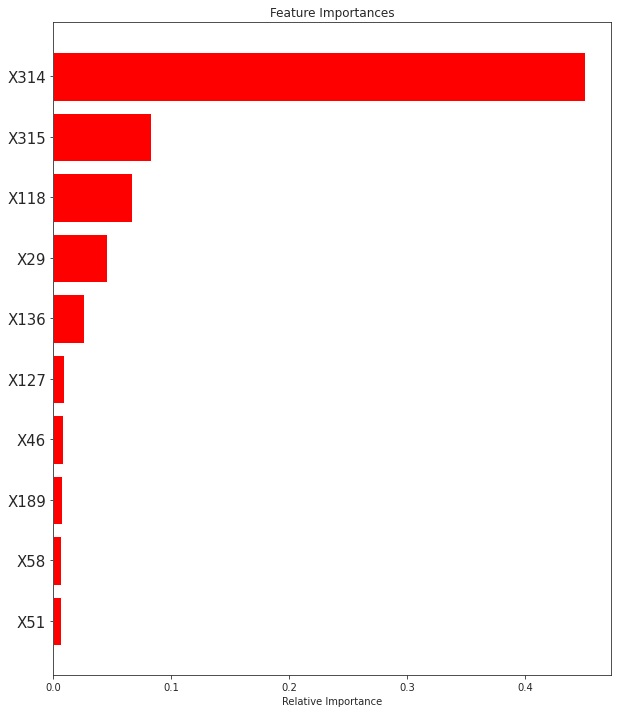

In [63]:
from sklearn.ensemble import RandomForestRegressor
import joblib

binary_dataframe = featured_train.drop(['ID','y','X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8'],axis=1)
result_y = featured_train['y']

#create a Regressor model
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
# fit the model on data
rf.fit(binary_dataframe, result_y)
save_model = joblib.dump(rf,'feature_imp_rf.pkl')
# get the sorted indices of features
features = binary_dataframe.columns
importances = rf.feature_importances_
imp_feat_idx = np.argsort(importances)[-10:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(imp_feat_idx)), importances[imp_feat_idx], color='r', align='center')
plt.yticks(range(len(imp_feat_idx)), [features[i] for i in imp_feat_idx],fontsize=15)
plt.xlabel('Relative Importance')
plt.show()

Feature X314 is the most important feature followed by X315 and X118. I can use these three features further in feature selection in the notebook.

In [64]:
top_binary_feat = [features[i] for i in imp_feat_idx]
print(top_binary_feat)

['X51', 'X58', 'X189', 'X46', 'X127', 'X136', 'X29', 'X118', 'X315', 'X314']


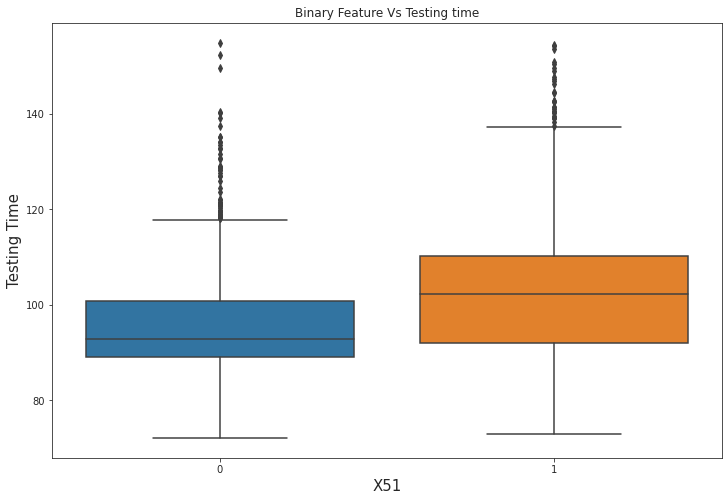

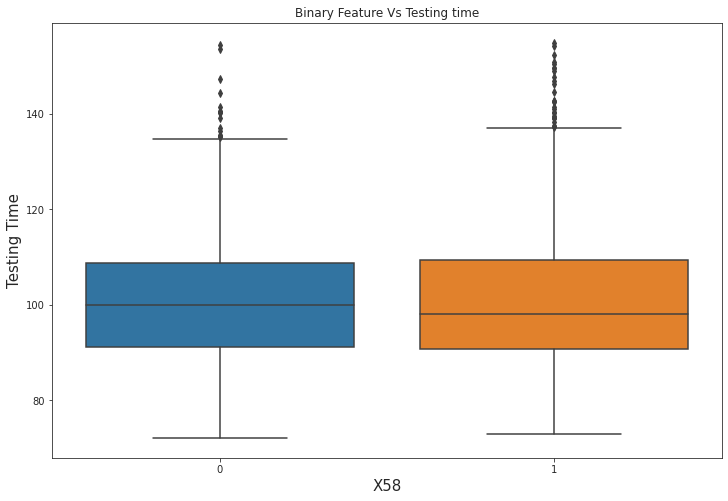

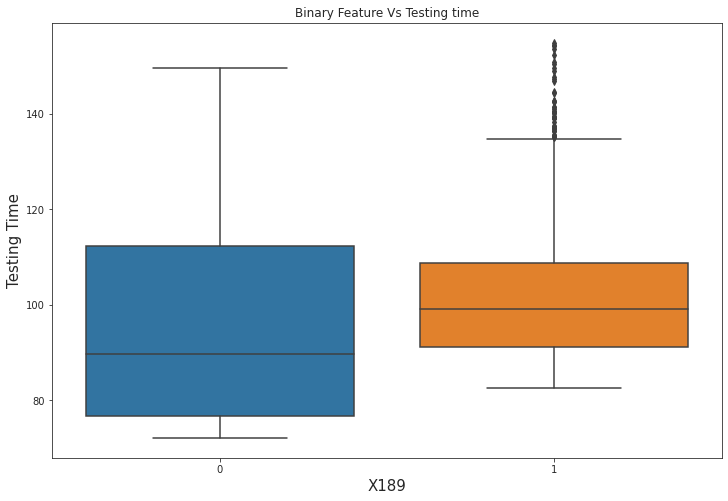

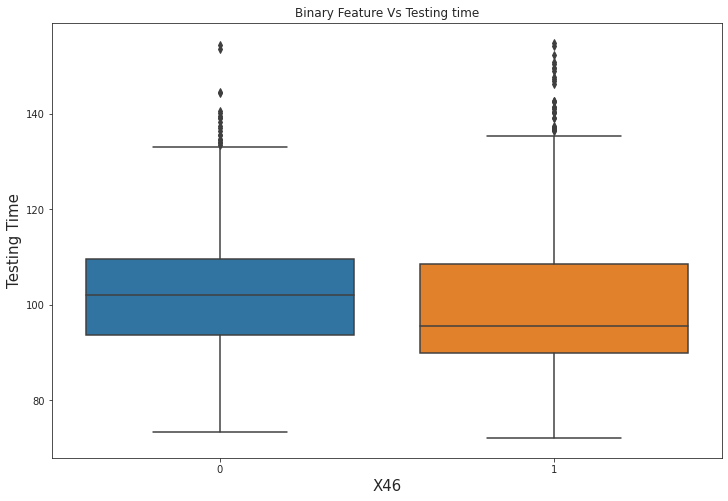

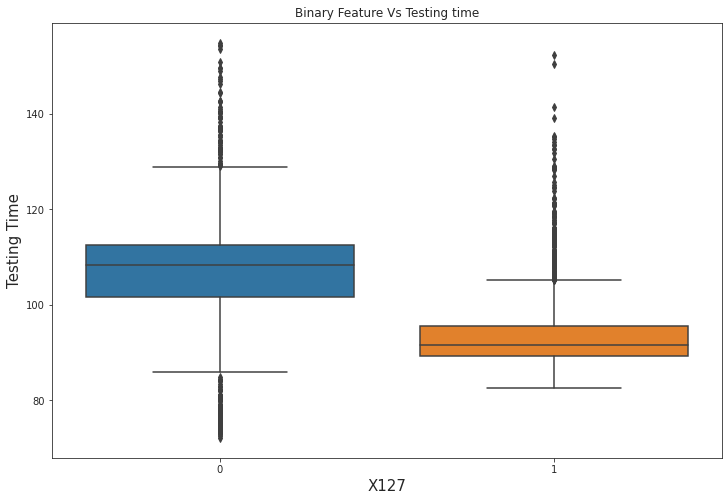

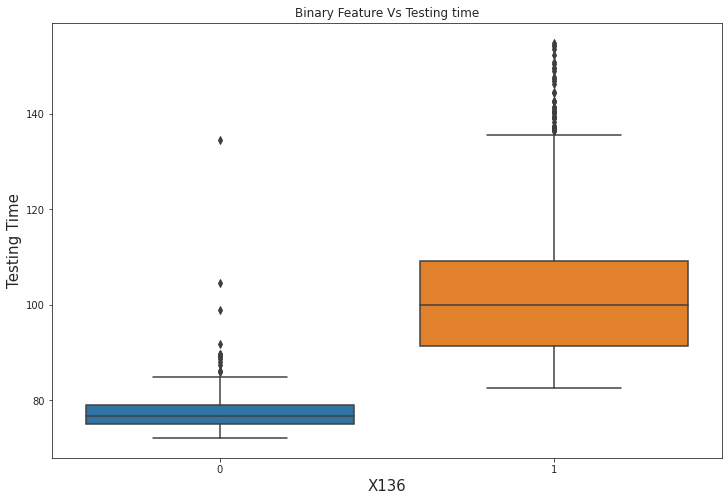

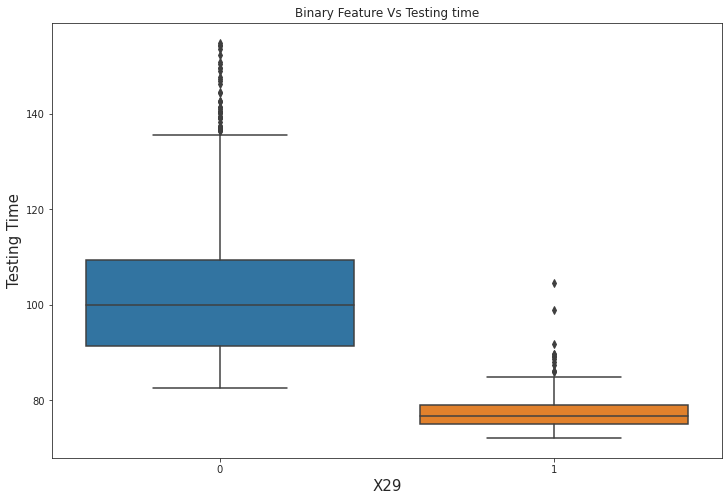

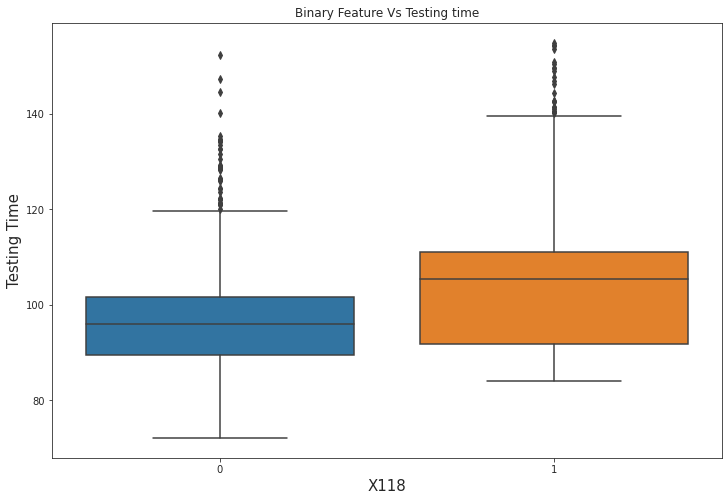

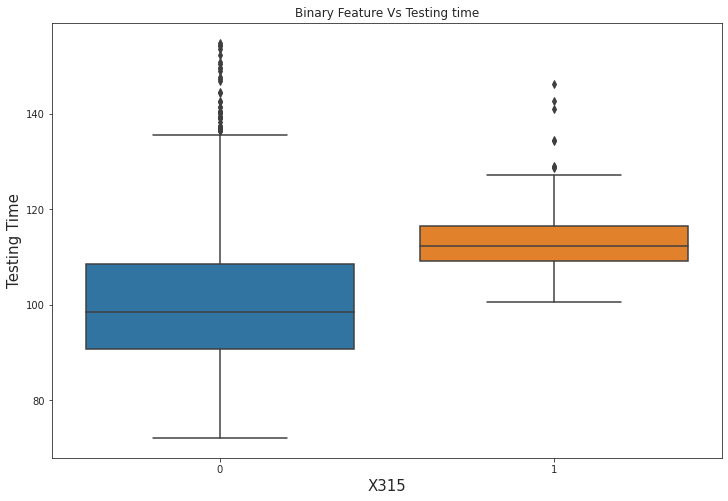

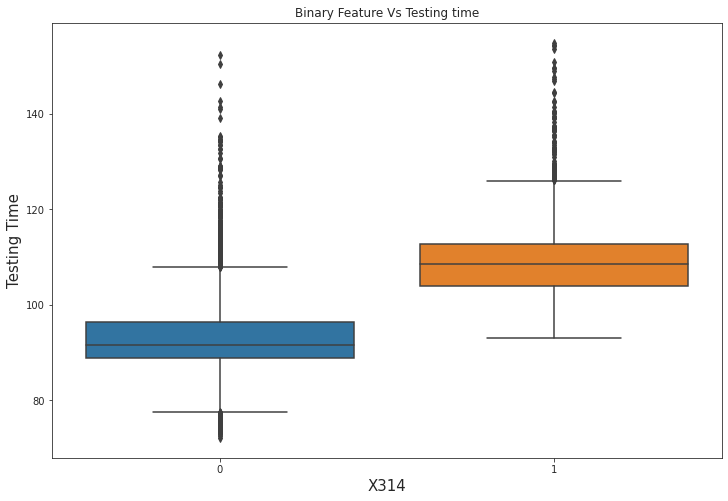

In [65]:
for feat in top_binary_feat:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=binary_dataframe[feat], y=result_y)
    plt.title("Binary Feature Vs Testing time")
    plt.xlabel(feat,fontsize=15)
    plt.ylabel("Testing Time",fontsize=15)

### Observation

From above plots it is observed that the binary variables are pretty well distributed. I can say as the feature's presence or absence is affecting the testing time to change. 
- For features 'X314', 'X315', 'X118', 'X136' 'X47' when these are present in the car configuration then most of the configurations take more time for testing.
- For features 'X29','X127', the configurations which are not having these features are tending to take more testing time.
- For 'X189','X46','X58' the configurations having almost similar testing when it present and also when it is not presnt in the configuration.

## EDA Conclusion

- There are No NaN values in the dataset


- There are No duplicate rows in the dataset


- Considered values all above 155 as outliers


- Removed low variance categorical feature:

  ['X4']
  
  
- Removed zero variance binary features:

  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X339', 'X347']
  

- Removed same variance binary features: 

  ['X35', 'X37', 'X39', 'X54', 'X76', 'X84', 'X90', 'X94', 'X102', 'X113', 'X119', 'X122', 'X129', 'X134', 'X137', 'X140', 'X146', 'X147', 'X172', 'X198', 'X199', 'X213', 'X214', 'X215', 'X216', 'X217', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X253', 'X254', 'X262', 'X263', 'X264', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X348', 'X352', 'X360', 'X363', 'X364', 'X365', 'X368', 'X370', 'X371', 'X382', 'X385']